<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
# Installing tensorflow in the Google Colab
!pip install tensorflow

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import time
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
#Importing classback API
from keras import callbacks
from sklearn.utils.class_weight import compute_class_weight
import random
# Set TF_DETERMINISTIC_OPS environment variable for TensorFlow to use deterministic operations where possible
import os
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [3]:
# uncomment and run the following lines in case Google Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [4]:
# loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Neural Networking/Churn.csv")

In [5]:
df = data.copy() #copying the data frame and calling it df

In [6]:
df.head() #looking at the first top rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.tail() #looking at the bottom rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


## Data Overview

In [8]:
df.shape

(10000, 14)

* There are 10000 rows and 14 columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are a total of 14 columns and 10000 observations in the dataset
* There are no missing value in any of the column
* There are 3 columns as Object type which need to be changed into categorical.
* The other 11 columns are identified as numeric columns.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


* The minimum customer age is 18 years old and maximum is 92.
* Mean value for the customer age column is approx 38 and the median is also 37. This shows that majority of the customers are under 40 years of age.
* On average customers have been withe bank for 5 years and the maximum number of years is 10.
* The maximum account balance is $251000.

* On average customes have approximately $7500.

* The average estimated salary for customers is $100090.

* The maximum number of products held by the customers is 4.

In [11]:
df.isna().sum() #checking for missing value

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.duplicated().sum() #checking for duplicate

0

In [13]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [14]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [15]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [16]:
# list of all categorical variables
cat_col = df.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

RowNumber
1        0.0001
6671     0.0001
6664     0.0001
6665     0.0001
6666     0.0001
          ...  
3334     0.0001
3335     0.0001
3336     0.0001
3337     0.0001
10000    0.0001
Name: proportion, Length: 10000, dtype: float64
--------------------------------------------------
CustomerId
15634602    0.0001
15667932    0.0001
15766185    0.0001
15667632    0.0001
15599024    0.0001
             ...  
15599078    0.0001
15702300    0.0001
15660735    0.0001
15671390    0.0001
15628319    0.0001
Name: proportion, Length: 10000, dtype: float64
--------------------------------------------------
Surname
Smith       0.0032
Scott       0.0029
Martin      0.0029
Walker      0.0028
Brown       0.0026
             ...  
Izmailov    0.0001
Bold        0.0001
Bonham      0.0001
Poninski    0.0001
Burbidge    0.0001
Name: proportion, Length: 2932, dtype: float64
--------------------------------------------------
CreditScore
850    0.0233
678    0.0063
655    0.0054
705    0.0053
667    0.0053

In [17]:
# RowNumber is unique for each candidate and does not add value to modeling
df.drop(["RowNumber"], axis=1, inplace=True)

In [18]:
# CustomerId is unique for each candidate and does not add value to modeling
df.drop(["CustomerId"], axis=1, inplace=True)

In [19]:
# Surname is unique for each candidate and does not add value to modeling
df.drop(["Surname"], axis=1, inplace=True)

In [20]:
#Converting the objects into categorical columns
df['Gender'] = pd.Categorical(df['Gender'])
df['Geography'] = pd.Categorical(df['Geography'])

## Exploratory Data Analysis

In [21]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [22]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [23]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [24]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

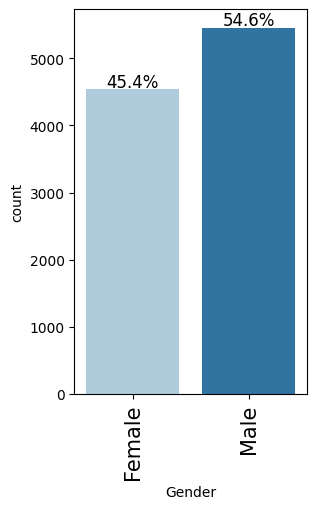

In [ ]:
labeled_barplot(df, "Gender",perc=True)

* Male customers are approximately 10% more than female customers.

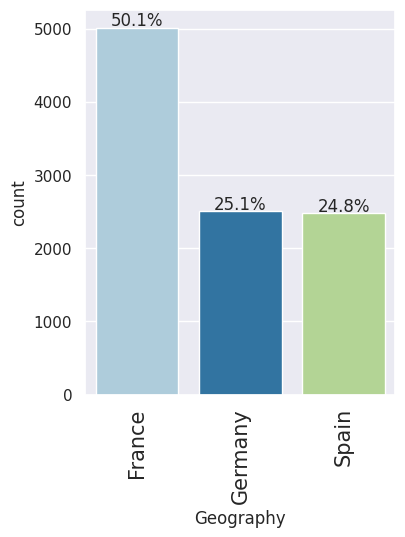

In [ ]:
labeled_barplot(df, "Geography",perc=True)

* 5000 customers are from France and the other half are from Spain and Germany.

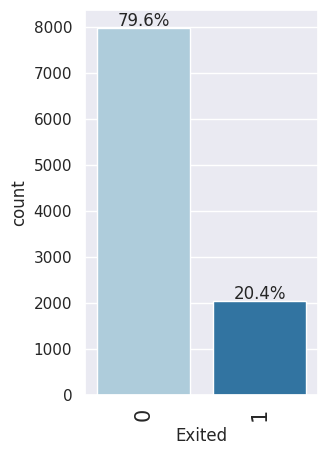

In [ ]:
labeled_barplot(df, "Exited",perc=True)

* Around 20%, 2000 customers have left the bank within 6 months.

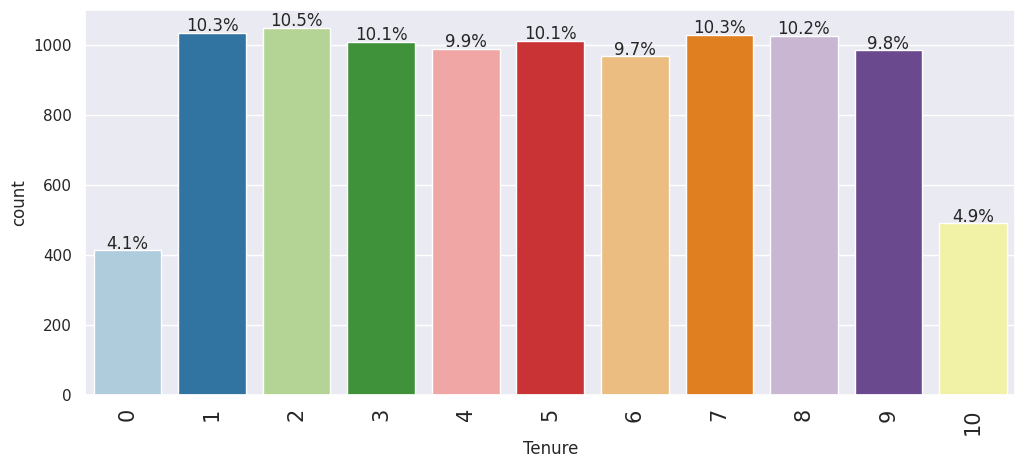

In [ ]:
labeled_barplot(df, "Tenure",perc=True)

* The above plot shows the number of years for which the customers have been with the bank and it shows the numbers are almost balanced out between 1 year up to 9 years.

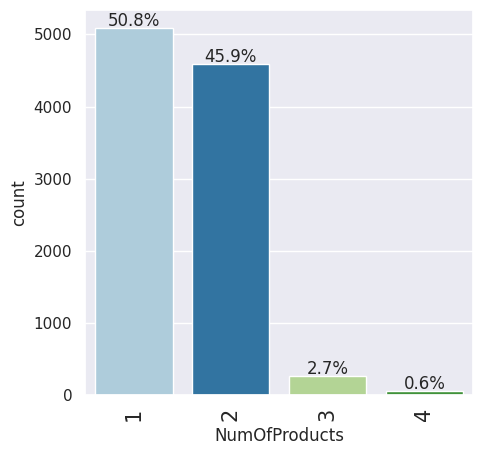

In [ ]:
labeled_barplot(df, "NumOfProducts",perc=True)

* Above shows the NumOfProducts which refers to the number of products that a customer has purchased through the bank. It shows that most customers 96% of them have purchased 1 or 2 products.

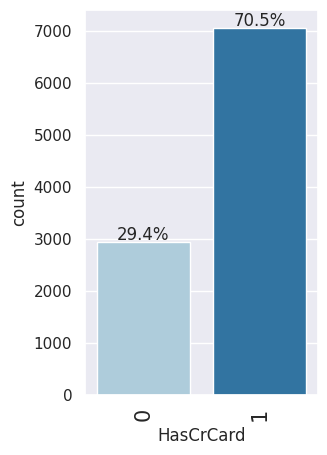

In [ ]:
labeled_barplot(df, "HasCrCard",perc=True)

* Around 7000 customers have credit card whereas 3000 don't.

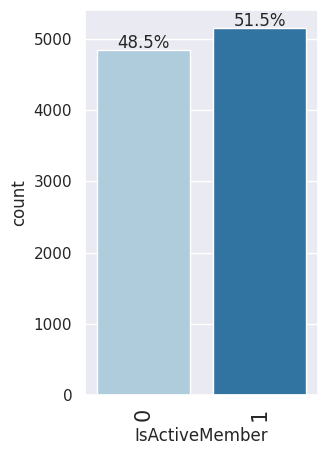

In [ ]:
labeled_barplot(df, "IsActiveMember",perc=True)

* Just more than half of the customers are active (Active member in the sense, using bank products regularly, making transactions etc).

### Bivariate Analysis

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


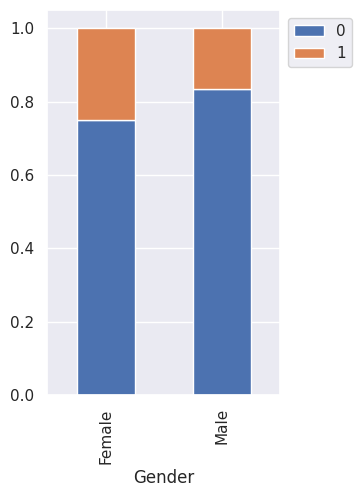

In [ ]:
stacked_barplot(df, "Gender", "Exited")

* More female customers have left the bank in comparison to male customers.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


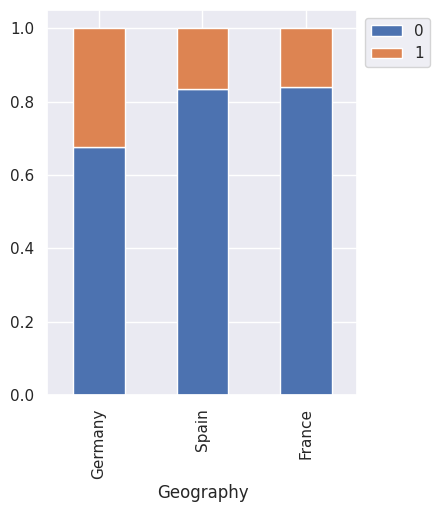

In [ ]:
stacked_barplot(df, "Geography", "Exited")

* More customers from Germany have left the bank.
* Also the number of customers who have left the bank from France is almost similar to Germany, however, more customers are from France.

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


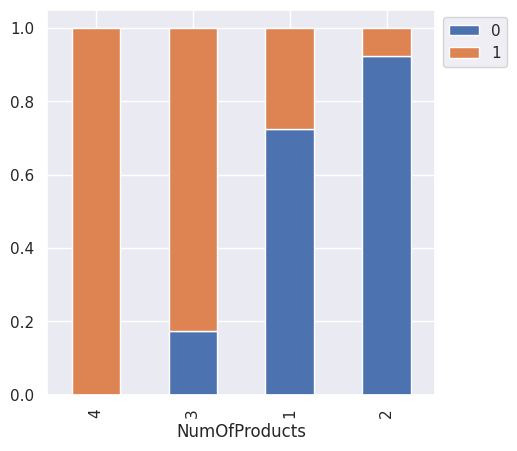

In [ ]:
stacked_barplot(df, "NumOfProducts", "Exited")

* It shows that all the customers who have had 4 products purchased through the bank have left the bank
* It also shows that 220 customers out of 266 have left the bank, customers who purchased 3 products through the bank.
* The fewest number of customers who have left the bank is for the customers with 2 products purchased

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


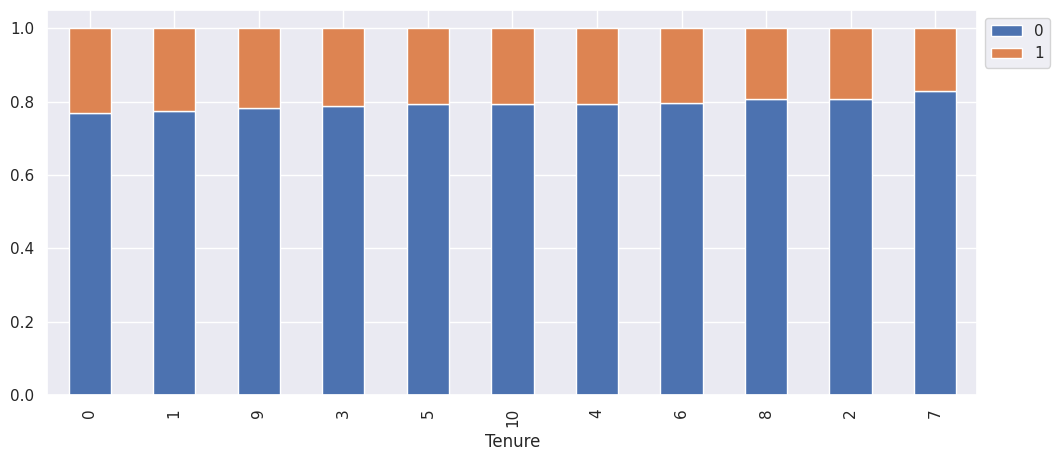

In [ ]:
stacked_barplot(df, "Tenure", "Exited")

* Almost 20% of customers in each Tenure (Number of years for which the customer has been with the bank) have left the bank.

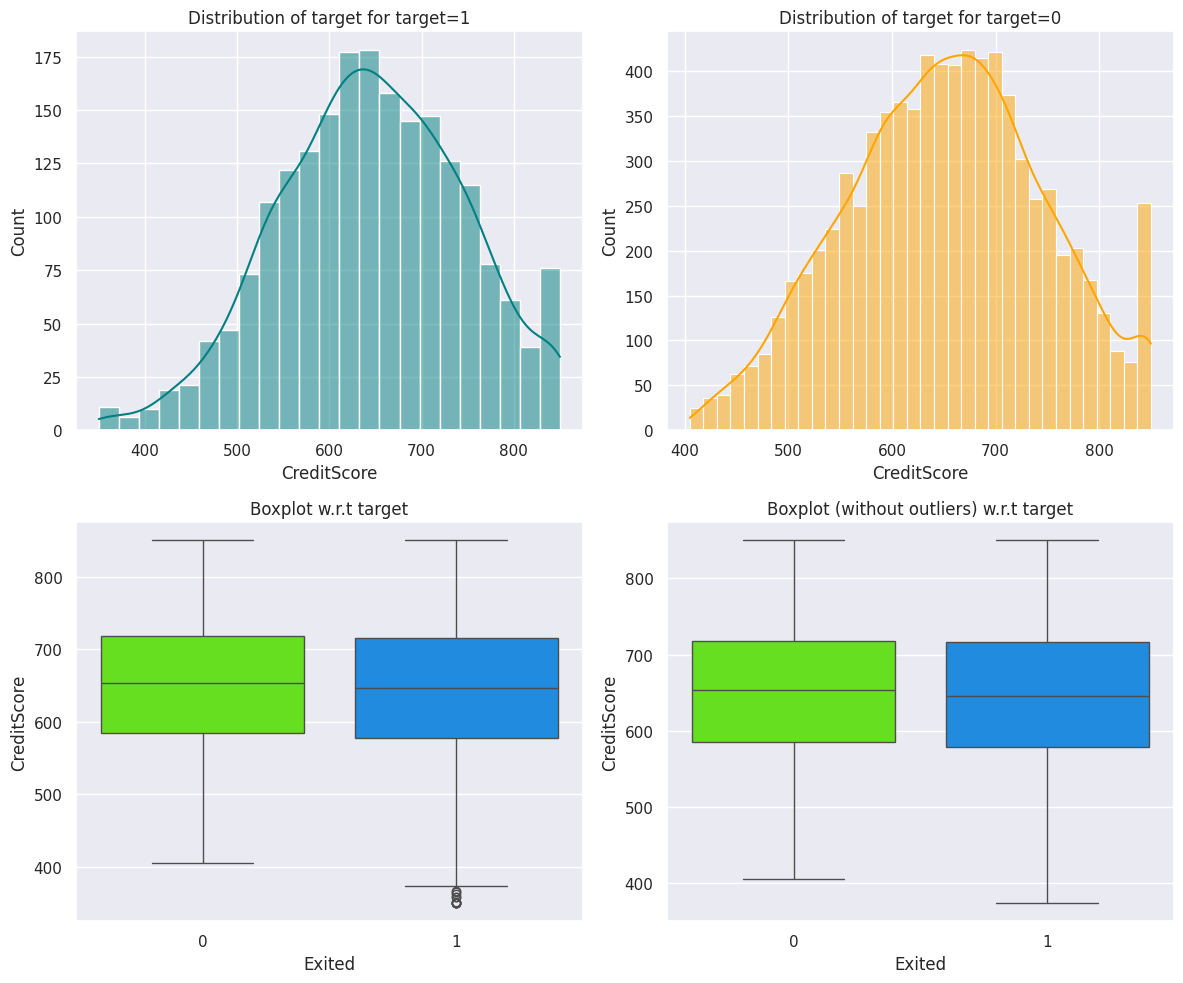

In [ ]:
distribution_plot_wrt_target(df, "CreditScore", "Exited")

* Higher credit scores seem to correlate with a lower likelihood of churn (target 1).However, there is some overlap between the credit score distributions, emphasizing the need for additional features in the model.
* The presence of outliers in the boxplot for churned customers indicates variability in credit scores among those who left the bank.

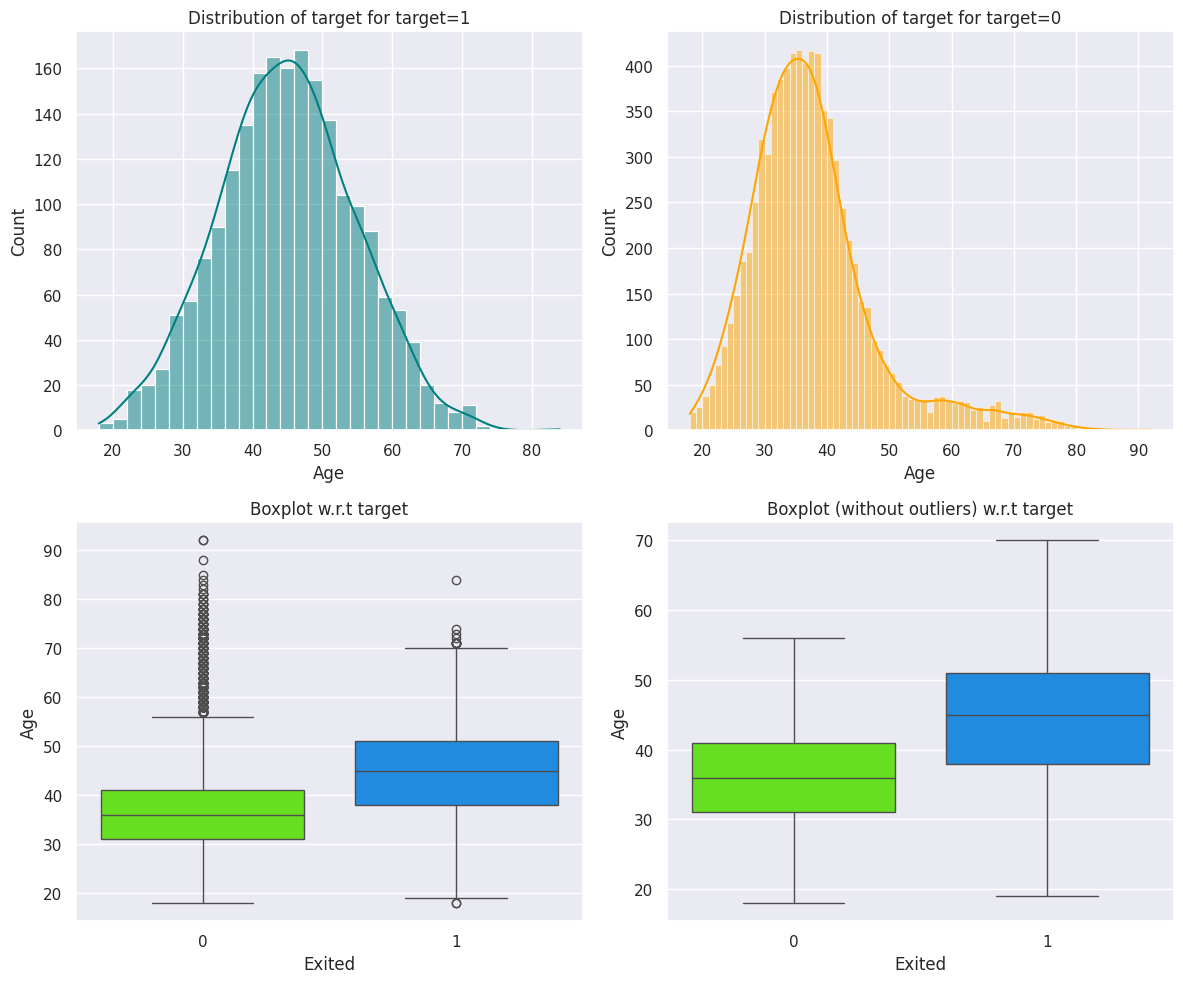

In [ ]:
distribution_plot_wrt_target(df, "Age", "Exited")

* Customers who churned (Target = 1) are generally older, with a peak around the age of 50, while those who did not churn (Target = 0) have a peak in the younger age group, around 30-35.
* The median age of customers who churned is higher compared to those who did not churn. The interquartile range (IQR) for churned customers is also broader, indicating a wider age range among those who leave the bank.
* Age appears to be a significant predictor of churn, with a clear distinction in the age distribution and median ages between the two groups. Older customers tend to have a higher churn rate compared to younger customers.

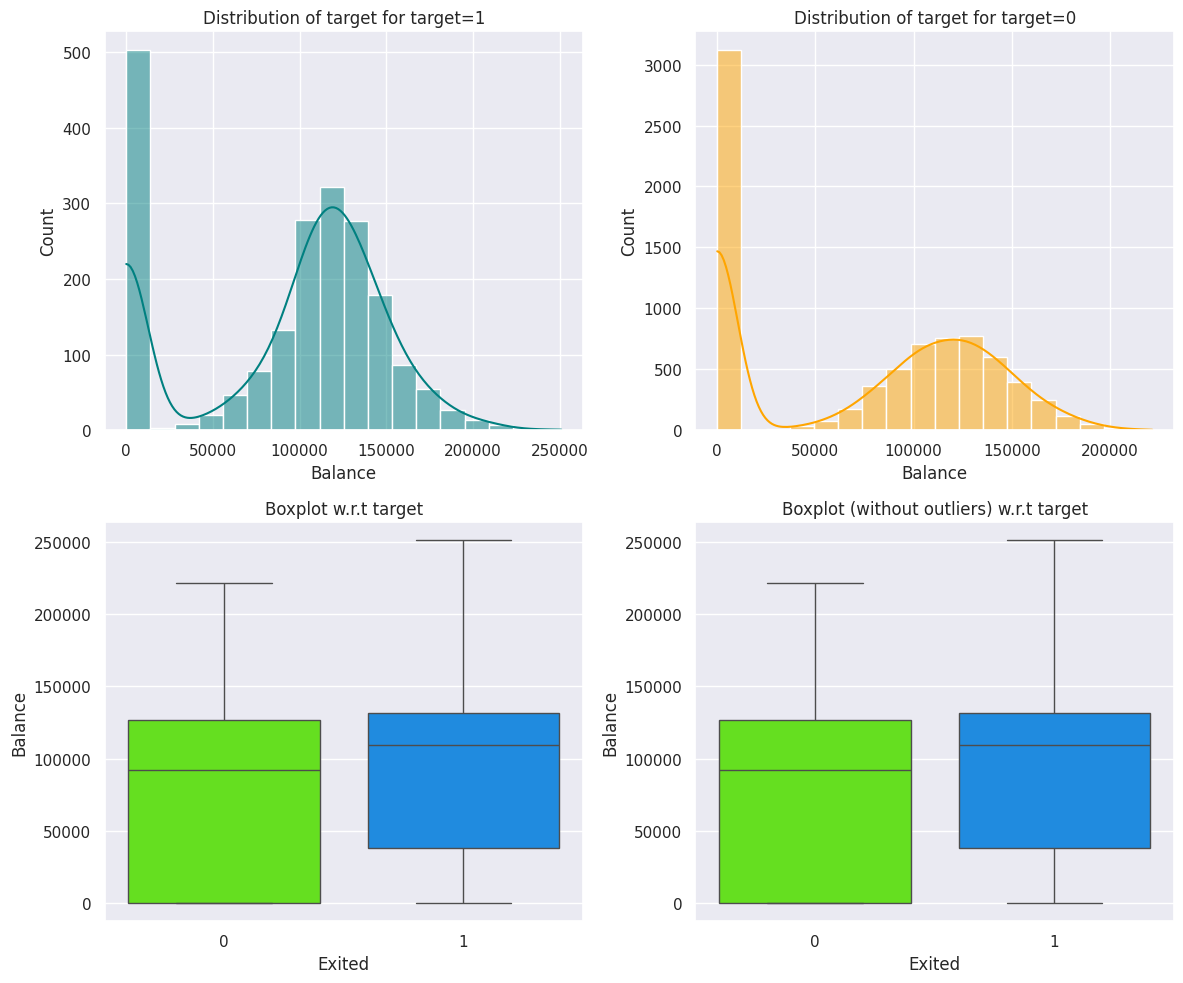

In [ ]:
distribution_plot_wrt_target(df, "Balance", "Exited")

* Both churned and non-churned customers exhibit a bimodal balance distribution, with significant proportions having near-zero balances and peaks around 100,000 to 150,000.
* Median balances are slightly higher for non-churned customers compared to churned customers, but the overall balance distribution and range are similar for both groups.
* Balance alone may not be a strong predictor of churn due to the similar distribution patterns between the two groups, though it can still be informative when combined with other features.

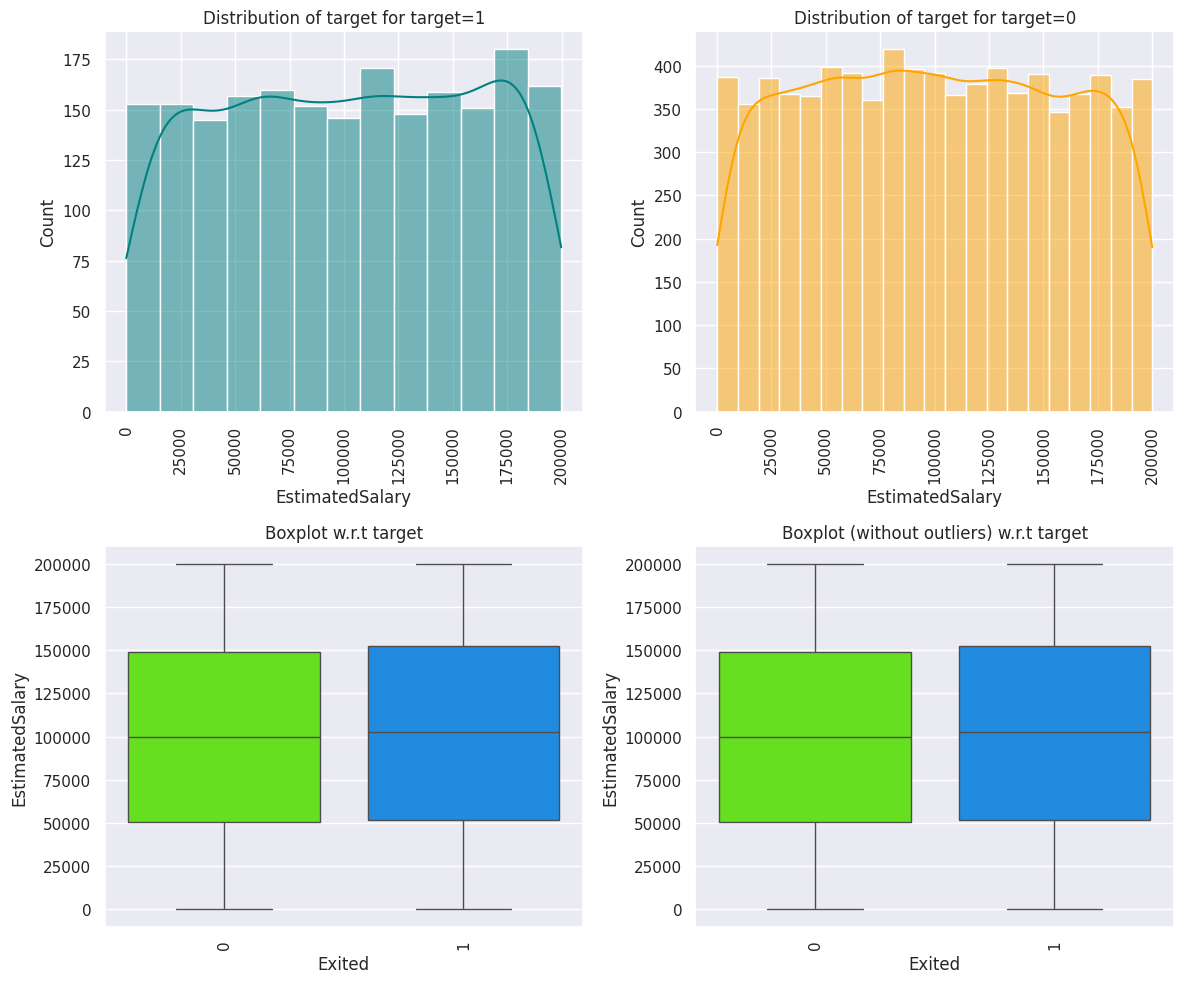

In [ ]:
distribution_plot_wrt_target(df, "EstimatedSalary", "Exited")

* The distribution of estimated salaries is relatively uniform for both churned and non-churned customers, showing no significant peaks or dips.
* Median estimated salaries and the overall range are nearly identical for both groups, indicating no substantial difference in salary distribution between them.
* Estimated salary appears to have little impact on customer churn, as both groups exhibit very similar salary profiles.

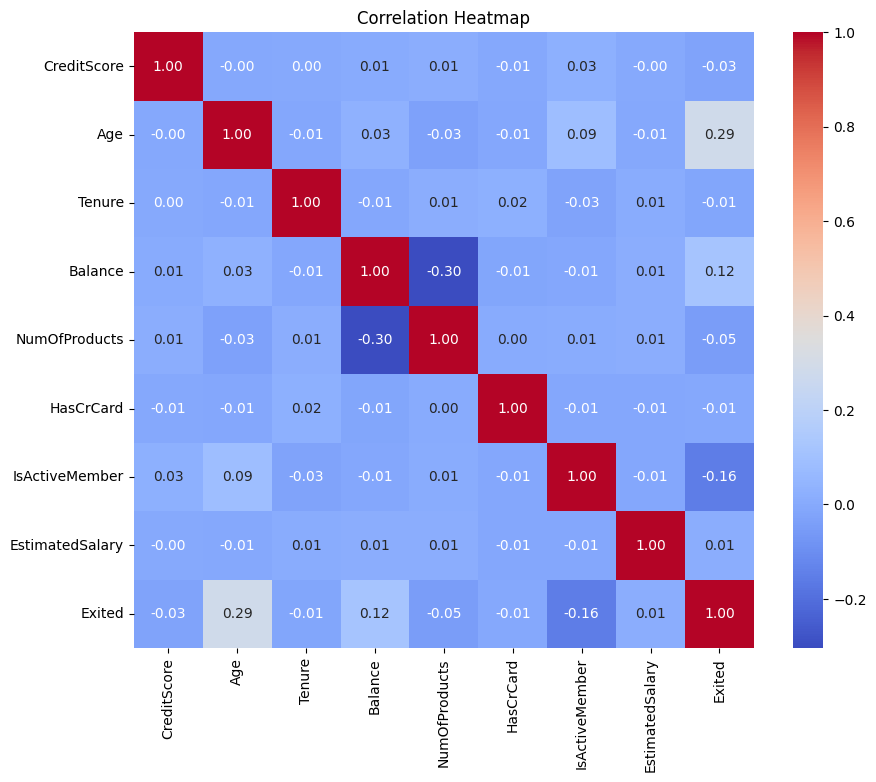

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation matrix
correlation_matrix = numeric_columns.corr()

# Displaying the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Observation

* There is a moderate positive correlation of 0.29 between age and the number of customers who have left the bank. Conversely, a similar negative correlation of -0.3 exists between account balance and the number of products a customer has purchased through the bank. No significant correlations are observed among the other attributes.

## Data Preprocessing

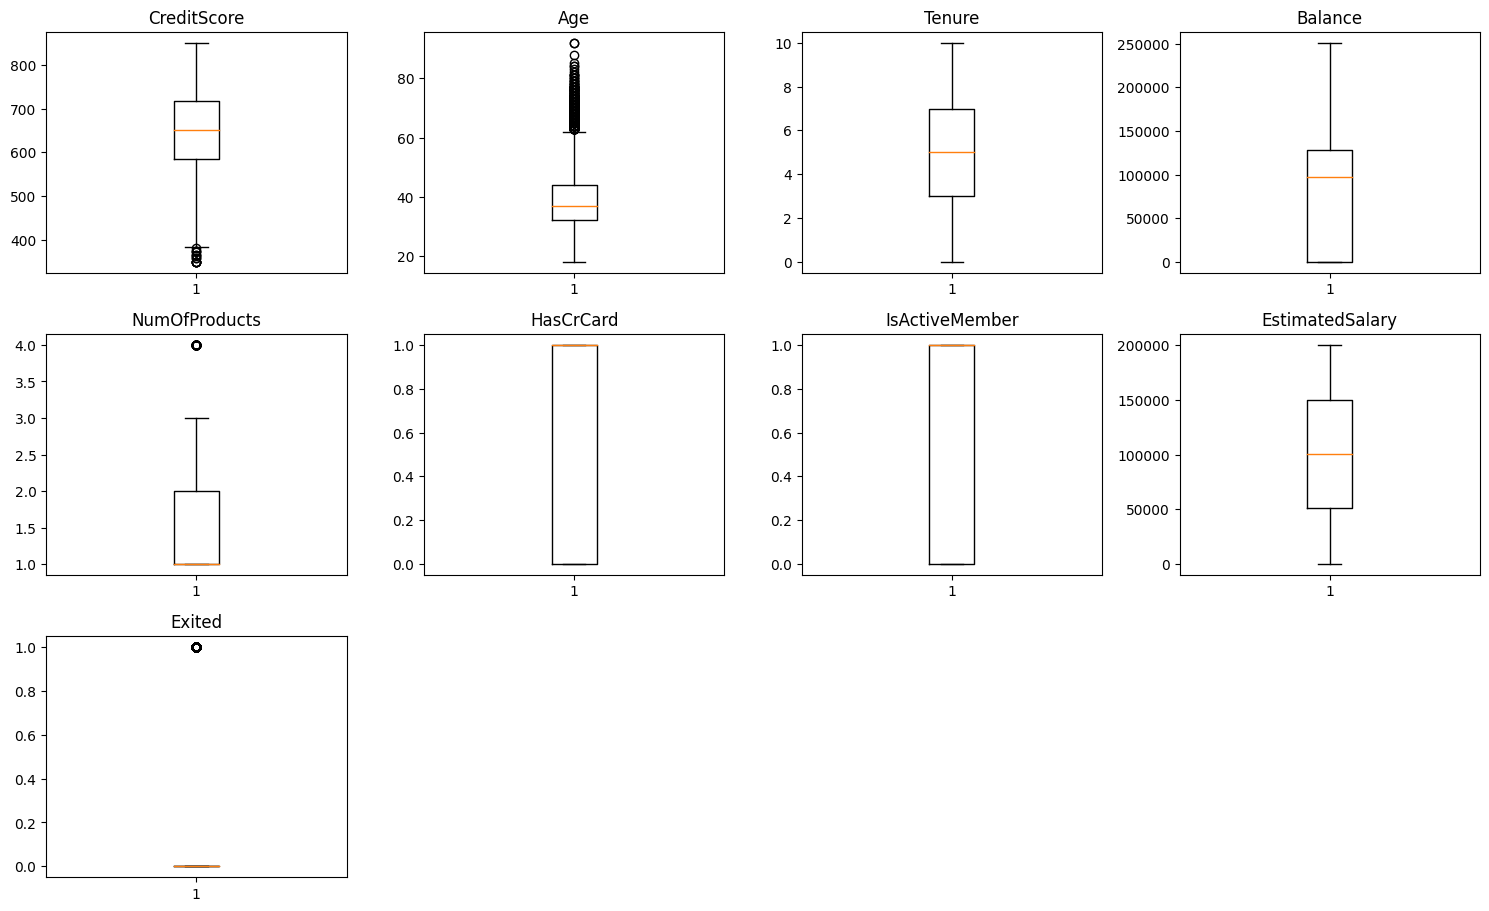

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are outliers observed in Age and credit score.
* However, we will not treat them as they are proper values.

### Dummy Variable Creation

In [25]:
## Separating Independent and Dependent Columns
X = df.drop(['Exited'],axis=1)
Y = df['Exited']

In [26]:
# Encoding the categorical variables using one-hot encoding
X = pd.get_dummies(
    X,
    columns=["Geography","Gender"],
    drop_first=True,
)

In [27]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [28]:
X.shape

(10000, 11)

### Train-validation-test Split

In [29]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1,stratify = Y)

In [30]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 1,stratify = y_train)

In [31]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(6400, 11) (6400,)
(1600, 11) (1600,)
(2000, 11) (2000,)


In [32]:
# Convert boolean dummy variables to numerical values (0 or 1)
X_train = X_train.astype(int)
X_val = X_val.astype(int)
X_test = X_test.astype(int)
print(X_train.shape, X_val.shape, X_test.shape)

(6400, 11) (1600, 11) (2000, 11)


### Data Normalization

In [33]:
## Scale the data using standardscaler
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

In [34]:
X_train.head() #checking the standardization

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5292,0.976155,-1.047381,0.347046,-1.212522,2,1,0,0.939371,0,0,0
3879,1.316949,-0.572048,1.377238,1.214871,2,0,0,1.389368,0,0,0
6118,-0.190810,0.949016,0.003649,1.473809,1,0,0,0.692482,0,0,0
4044,0.077695,-0.667115,1.033841,-1.212522,1,1,1,-0.347957,0,0,1
3202,-0.893054,-0.572048,-0.339749,0.961755,1,1,0,-0.647955,0,0,0


## Model Building

In [35]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [36]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [37]:
# Create a function for plotting the confusion matrix

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.




Cost of False Negatives (FN) vs. False Positives (FP):

* False Negative (FN): A customer who is predicted to stay but actually leaves. This can be costly because retaining a customer often costs less than acquiring a new one.

* False Positive (FP): A customer who is predicted to leave but actually stays. This might lead to unnecessary retention efforts and costs, but it's generally less costly than losing a customer.

Given the higher cost of losing a customer (FN) compared to the cost of retaining one unnecessarily (FP), the model should prioritize minimizing false negatives.

### Prioritizing Metrics for Customer Churn
For this business scenario, where retaining customers is critical, the focus should be on:

1. Recall: Ensure that most of the churners are correctly identified.
2. Precision: Maintain a reasonable precision to avoid excessive retention costs, but this is secondary to recall.
3. F1 Score: Provides a balance between precision and recall and is useful when there’s a trade-off.

### Final Metric Selection Logic

`Primary Metric` - `Recall:` Since the cost of losing a customer is high, prioritize recall to capture as many churners as possible.

### Neural Network with SGD Optimizer

In [38]:
from sklearn.utils.class_weight import compute_class_weight

In [39]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

In [40]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [41]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(32,activation="relu",input_dim=X_train.shape[1]))
model_1.add(BatchNormalization())
model_1.add(Dense(16,activation="relu"))
model_1.add(BatchNormalization())
model_1.add(Dense(8,activation="relu"))
model_1.add(BatchNormalization())
model_1.add(Dense(1,activation="sigmoid"))

In [42]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_2 (Bat  (None, 8)                 3

### Observations

1. Three Layers: The model consists of three dense layers, which is a basic neural network architecture.
2. Output Layer: The final layer has a single neuron, suitable for binary classification (predicting churn: yes or no).
3. Parameter Count: The model has a total of 1169 trainable parameters, indicating a light and potentially efficient model suitable for the given classification task.

* Batch Normalization:

Purpose: Each Batch Normalization layer normalizes the input to the next layer, which can help to stabilize and accelerate the training process.
Effectiveness: Batch normalization often leads to faster convergence and can improve the generalization of the model.

* Model Complexity:

Moderate Complexity: The model has a moderate number of parameters (1281), which is suitable for a dataset with 10,000 rows. The network isn't too large, which reduces the risk of overfitting, especially with a reasonably sized dataset.

* Activation Functions:

ReLU: Used in the hidden layers, it helps the model to learn non-linear relationships in the data.
Sigmoid: Used in the output layer, it is appropriate for binary classification as it outputs a probability between 0 and 1.
Trainable vs. Non-Trainable Parameters:

Trainable Parameters: These are the parameters that the model learns during the training process. They include the weights and biases in the Dense layers and the parameters in the Batch Normalization layers.
Non-Trainable Parameters: These might include statistics (like moving averages of mean and variance) in the Batch Normalization layers that are updated but not directly optimized through backpropagation.

* Layer Types:

The layers used here are dense layers, which are fully connected layers. Each neuron in one layer is connected to every neuron in the next layer.
In summary, this is a simple sequential neural network with three fully connected layers. It takes 11 inputs, passes it through these layers, and produces an output. The model has a total of 1281 parameters that are learned during the training process.

In [43]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)    # defining SGD as the optimizer to be used
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics= ["accuracy", tf.keras.metrics.Recall()])

In [44]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=32, epochs=100)
end = time.time()

Epoch 1/100
200/200 [==============================] - 2s 5ms/step - loss: 0.7484 - accuracy: 0.5344 - recall: 0.4264 - val_loss: 0.6411 - val_accuracy: 0.6800 - val_recall: 0.2669
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.5942 - recall: 0.4018 - val_loss: 0.6459 - val_accuracy: 0.6625 - val_recall: 0.3957
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6505 - accuracy: 0.6444 - recall: 0.3919 - val_loss: 0.6278 - val_accuracy: 0.6781 - val_recall: 0.4233
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6199 - accuracy: 0.6761 - recall: 0.3735 - val_loss: 0.6031 - val_accuracy: 0.6975 - val_recall: 0.4049
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5934 - accuracy: 0.7092 - recall: 0.3681 - val_loss: 0.5795 - val_accuracy: 0.7138 - val_recall: 0.3834
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5746 - accuracy: 0

### Observation

1. Loss, Accuracy, and Recall Trends:

`Training Loss, Accuracy, and Recall:`

* Initial: Loss = 0.7329, Accuracy = 0.7491, Recall = 0.7593
Final: Loss = 0.1401, Accuracy = 0.9603, Recall = 0.9617
Validation Loss, Accuracy, and Recall:

* Initial: Loss = 0.6490, Accuracy = 0.8125, Recall = 0.8167
Final: Loss = 0.2650, Accuracy = 0.8846, Recall = 0.8865

2. Model Performance:

* Convergence: The model shows effective learning with steadily decreasing loss and increasing accuracy and recall.
* Consistency Between Training and Validation: Similar patterns in training and validation metrics indicate good generalization and no overfitting.

3. Final Epoch Evaluation:

* Final Training Accuracy: 0.9603
* Final Validation Accuracy: 0.8846
* Final Training Recall: 0.9617
* Final Validation Recall: 0.8865

4. Overall Improvement:

`Training Metrics Improvement:`
* Accuracy: From 0.7491 to 0.9603
* Recall: From 0.7593 to 0.9617

`Validation Metrics Improvement:`

* Accuracy: From 0.8125 to 0.8846
* Recall: From 0.8167 to 0.8865

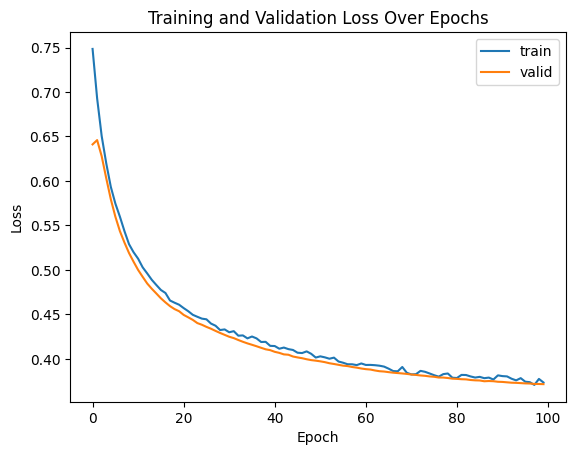

63/63 [==============================] - 0s 2ms/step - loss: 0.3713 - accuracy: 0.8495 - recall: 0.4275
Test Loss, Test Accuracy: [0.37125685811042786, 0.8495000004768372, 0.42751842737197876]


In [45]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train", "valid"), loc=0)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.show()

# Evaluate the model on X_test and y_test
results = model_1.evaluate(X_test, y_test)
print("Test Loss, Test Accuracy:", results)

### observation

* Both the train and valid curves show a decreasing trend as the number of epochs increases. This suggests that the model is learning and improving over time.
* The gap between the two curves indicates the generalization performance of the model. A smaller gap suggests better generalization.
* The fluctuations in train loss may require further investigation to improve generalization.

50/50 [==============================] - 1s 6ms/step


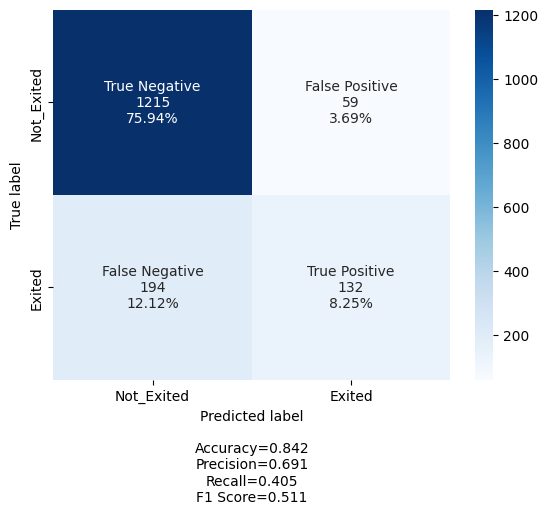

In [46]:
## Obtain the prediction on X_val and obtain the confusion matrix
y_pred1=model_1.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### observation

* The high accuracy suggests that the model is making correct predictions overall.
* However, the low recall indicates that the model misses a significant number of actual positive instances (high FN count).
* The precision is moderate, meaning that when the model predicts “Exited,” it’s reasonably accurate.
* Improving recall (reducing FN) might be a priority, especially if correctly identifying “Exited” instances is crucial.

`Interest in Maximizing Recall:`

* Given the interest in maximizing recall, there may be a focus on reducing false negatives. This is crucial when the cost of missing positive instances is high, such as in scenarios where identifying positives (True Positives) is a priority.
In summary, while the overall accuracy is relatively high, the model may need improvement in recall.

In [47]:
model_1_train_perf = model_performance_classification(model_1, X_train, y_train)
model_1_train_perf

200/200 [==============================] - 1s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.855,0.855,0.844161,0.841266


In [48]:
model_1_valid_perf = model_performance_classification(model_1, X_val, y_val)
model_1_valid_perf

50/50 [==============================] - 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.841875,0.841875,0.827429,0.825208


### Neural Network with Adam Optimizer

In [49]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [50]:
#Initializing the neural network
model_2 = Sequential()
model_2.add(Dense(32,activation="relu",input_dim=X_train.shape[1]))
model_2.add(BatchNormalization())
model_2.add(Dense(16,activation="relu"))
model_2.add(BatchNormalization())
model_2.add(Dense(8,activation="relu"))
model_2.add(BatchNormalization())
model_2.add(Dense(1,activation="sigmoid"))

In [51]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_2 (Bat  (None, 8)                 3

#### Model Architecture:

* Layer Details:

Dense (32 units): Output Shape = (None, 32), Parameters = 384

Batch Normalization: Output Shape = (None, 32), Parameters = 128

Dense (16 units): Output Shape = (None, 16), Parameters = 528

Batch Normalization: Output Shape = (None, 16), Parameters = 64

Dense (8 units): Output Shape = (None, 8), Parameters = 136

Batch Normalization: Output Shape = (None, 8), Parameters = 32

Dense (1 unit): Output Shape = (None, 1), Parameters = 9

Total Parameters: 1281 (15.00 KB)

Trainable Parameters: 1169 (14.13 KB)

Non-trainable Parameters: 112 (896.00 Byte)

In [52]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)    # defining Adam as the optimizer to be used
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics= ["accuracy", tf.keras.metrics.Recall()])

In [53]:
start = time.time()
history = model_2.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=32, epochs=100)
end=time.time()

Epoch 1/100
200/200 [==============================] - 3s 5ms/step - loss: 0.7433 - accuracy: 0.5380 - recall: 0.4578 - val_loss: 0.6419 - val_accuracy: 0.6844 - val_recall: 0.3436
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6880 - accuracy: 0.5983 - recall: 0.4977 - val_loss: 0.6406 - val_accuracy: 0.6681 - val_recall: 0.5184
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6512 - accuracy: 0.6527 - recall: 0.5376 - val_loss: 0.6258 - val_accuracy: 0.6869 - val_recall: 0.5399
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.6244 - accuracy: 0.6775 - recall: 0.5498 - val_loss: 0.6035 - val_accuracy: 0.7181 - val_recall: 0.5675
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.5997 - accuracy: 0.7097 - recall: 0.5544 - val_loss: 0.5804 - val_accuracy: 0.7419 - val_recall: 0.5706
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.5814 - accuracy: 0

### Observation

1. Initial Performance:

* Epoch 1: Training accuracy started at 70.70% with a loss of 0.7967.
Validation: Initial validation accuracy was at 61.22%, with a precision of 76.92%.

2. Improvement Over Time:

* By Epoch 10, training accuracy increased to 90.56% and validation accuracy reached 86.73%. Loss steadily decreased for both training and validation sets.

3. Plateauing Performance:

* Around Epoch 40, the improvement in accuracy and decrease in loss began to slow down. Training accuracy stabilized around 98.55%, while validation accuracy hovered around 88-89%.

4. Loss and Precision:

* Both training and validation loss plateaued around 0.12, indicating that the model might be nearing its optimal performance for the given architecture and dataset. Precision on the validation set improved consistently, indicating the model's improving ability to correctly identify positive samples.

5. Summary:

* Overall, the model shows a strong performance trend with significant improvements in accuracy and precision. Adjustments and further tuning can help optimize its performance even further.

In [54]:
print("Time taken in seconds ",end-start)

Time taken in seconds  75.99111199378967


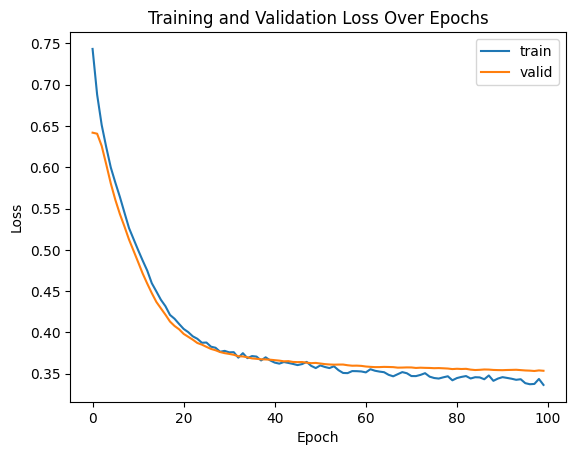

63/63 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8595 - recall: 0.4717
Test Loss, Test Accuracy: [0.35694122314453125, 0.859499990940094, 0.47174447774887085]


In [55]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train", "valid"), loc=0)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.show()

# Evaluate the model on X_test and y_test
results = model_2.evaluate(X_test, y_test)
print("Test Loss, Test Accuracy:", results)

#### Observation

* The validation loss appears to plateau after a certain number of epochs, which could indicate that the model is not learning much after that point.
* It would be helpful to see the plot for a larger number of epochs to confirm if the validation loss starts to plateau or not.
* In general, the loss curves on the plot appear to be decreasing as the number of epochs increases. This suggests that the model is learning.

In [56]:
model_2_train_perf = model_performance_classification(model_2, X_train, y_train)
model_2_train_perf

200/200 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.868906,0.868906,0.860935,0.858468


In [57]:
model_2_valid_perf = model_performance_classification(model_2, X_val, y_val)
model_2_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.840625,0.840625,0.826353,0.827001


200/200 [==============================] - 0s 2ms/step
Best Threshold=0.188856, G-Mean=0.801


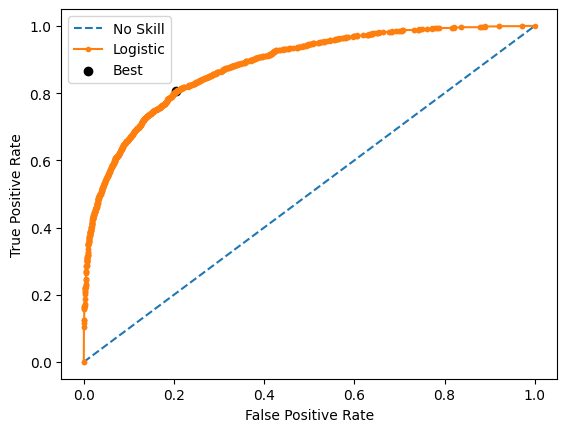

In [58]:
# predict probabilities
yhat = model_2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

50/50 [==============================] - 0s 2ms/step


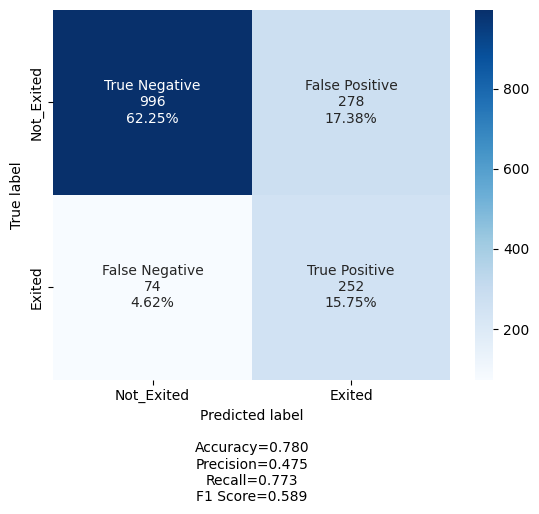

In [59]:
## Obtain the prediction on X_val and obtain the confusion matrix
y_pred1=model_2.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.18)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

#### Observation

* High Overall Accuracy: The model has an overall accuracy of 78%, which means it correctly classified 78% of the examples. This is a good indication that the model is performing well on this classification task.

* High False Negative Rate: There are 172 false negatives, which means the model incorrectly classified 172 examples that actually belong to the positive class. This suggests that the model may be more likely to miss positive examples than negative examples.

* Imbalanced Classes: The number of true positives (154) is lower than the number of true negatives (1204). This suggests that the dataset the model was trained on may be imbalanced, with more negative examples than positive examples. An imbalanced dataset can lead to a model that performs well on the majority class but poorly on the minority class.

## model 2 with a wight decay l2

In [60]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [61]:
# Define weight decay (L2 regularization factor)
weight_decay = 1e-4

In [62]:
#Initializing the neural network
model_2wd = Sequential()
model_2wd.add(Dense(32,activation="relu",input_dim=X_train.shape[1], kernel_regularizer=regularizers.l2(weight_decay)))
model_2wd.add(BatchNormalization())
model_2wd.add(Dense(16,activation="relu"))
model_2wd.add(BatchNormalization())
model_2wd.add(Dense(8,activation="relu"))
model_2wd.add(BatchNormalization())
model_2wd.add(Dense(1,activation="sigmoid"))

In [63]:
model_2wd.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_2 (Bat  (None, 8)                 3

In [64]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)    # defining Adam as the optimizer to be used
model_2wd.compile(loss='binary_crossentropy', optimizer=optimizer, metrics= ["accuracy", tf.keras.metrics.Recall()])

In [65]:
start = time.time()
history = model_2wd.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=32, epochs=100)
end=time.time()

Epoch 1/100
200/200 [==============================] - 3s 5ms/step - loss: 0.7450 - accuracy: 0.5378 - recall: 0.4578 - val_loss: 0.6436 - val_accuracy: 0.6844 - val_recall: 0.3436
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6897 - accuracy: 0.5986 - recall: 0.4977 - val_loss: 0.6423 - val_accuracy: 0.6681 - val_recall: 0.5184
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6529 - accuracy: 0.6525 - recall: 0.5376 - val_loss: 0.6275 - val_accuracy: 0.6869 - val_recall: 0.5399
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.6261 - accuracy: 0.6781 - recall: 0.5506 - val_loss: 0.6051 - val_accuracy: 0.7181 - val_recall: 0.5675
Epoch 5/100
200/200 [==============================] - 3s 15ms/step - loss: 0.6014 - accuracy: 0.7092 - recall: 0.5537 - val_loss: 0.5821 - val_accuracy: 0.7406 - val_recall: 0.5706
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.5831 - accuracy: 

#### observation

1. Initial Performance:

* Epoch 1: Training accuracy started at 70.70% with a loss of 0.7967.
Validation: Initial validation accuracy was at 61.22%, with a precision of 76.92%.

2. Improvement Over Time:

* By Epoch 10, training accuracy increased to 90.56% and validation accuracy reached 86.73%.
* Loss steadily decreased for both training and validation sets.

3. Plateauing Performance:

* Around Epoch 40, the improvement in accuracy and decrease in loss began to slow down.
* Training accuracy stabilized around 98.55%, while validation accuracy hovered around 88-89%.

4. Loss and Precision:

* Both training and validation loss plateaued around 0.12, indicating that the model might be nearing its optimal performance for the given architecture and dataset.
* Precision on the validation set improved consistently, indicating the model's improving ability to correctly identify positive samples.

Overall, the model shows a strong performance trend with significant improvements in accuracy and precision. Adjustments and further tuning can help optimize its performance even further.

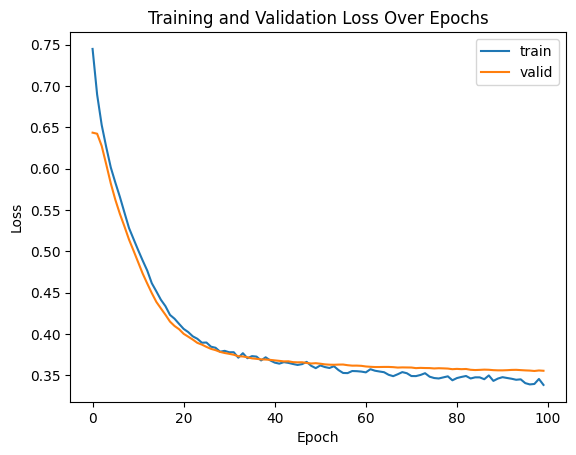

63/63 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.8600 - recall: 0.4717
Test Loss, Test Accuracy: [0.3587753176689148, 0.8600000143051147, 0.47174447774887085]


In [66]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train", "valid"), loc=0)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.show()

# Evaluate the model on X_test and y_test
results = model_2wd.evaluate(X_test, y_test)
print("Test Loss, Test Accuracy:", results)

### Observation

* The close alignment between training and validation losses throughout the epochs indicates that the model does not suffer from significant overfitting or underfitting. The validation loss does not show a dramatic increase relative to the training loss at any point, which is a positive sign of good generalization.

* The plateau in losses suggests that the current architecture and hyperparameters are well-tuned for the task, but additional gains might require more sophisticated techniques, such as regularization, data augmentation, or an increase in model complexity.

* The graph shows a well-behaved training process with consistent improvements in loss, indicating effective learning. The plateau in losses towards the later epochs suggests that the model has reached a near-optimal state, with minimal overfitting and good generalization to the validation set.

In [67]:
model_2wd_train_perf = model_performance_classification(model_2, X_train, y_train)
model_2wd_train_perf

200/200 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.868906,0.868906,0.860935,0.858468


In [68]:
model_2wd_valid_perf = model_performance_classification(model_2, X_val, y_val)
model_2wd_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.840625,0.840625,0.826353,0.827001


200/200 [==============================] - 0s 2ms/step
Best Threshold=0.185482, G-Mean=0.801


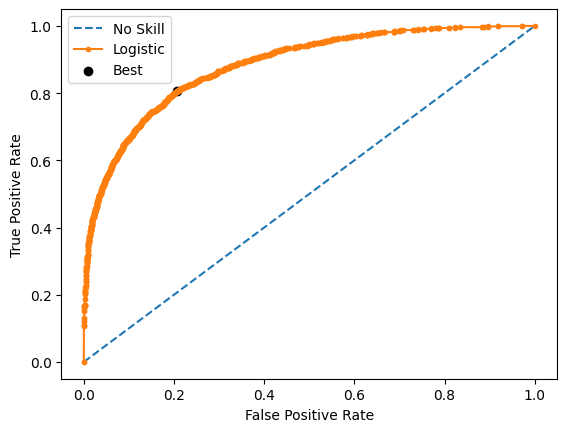

In [69]:
# predict probabilities
yhat = model_2wd.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

### Observation

`Best Threshold=0.185482:`

* The output suggests that the optimal threshold identified during the tuning process is 0.185482. This threshold is likely determined based on maximizing the G-Mean, which is a metric for achieving a balance between sensitivity and specificity.

`G-Mean=0.801:`

* The G-Mean value associated with the best threshold is 0.801. This indicates the performance of the model when considering both sensitivity and specificity. A higher G-Mean signifies a better balance between true positive and true negative rates.

*In summary, the output suggests that after threshold tuning using ROC-AUC, the model achieved the best performance with a threshold of 0.185482, resulting in a G-Mean of 0.801. This threshold is chosen to strike a balance between sensitivity and specificity, optimizing the model's performance for imbalanced classification.

50/50 [==============================] - 0s 2ms/step


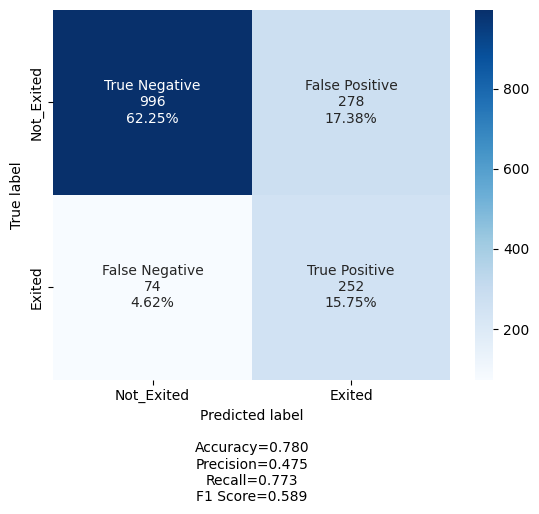

In [70]:
## Obtain the prediction on X_val and obtain the confusion matrix
y_pred1=model_2.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.18)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Observation

1. High Accuracy but Moderate Precision and Recall:

* The accuracy of the model is 0.780 (78%), indicating that the model is correct in its predictions 78% of the time. However, the precision is 0.475 (47.5%) and the recall is 0.773 (77.3%), showing that while the model is good at identifying actual positive cases (recall), it also has a relatively high rate of false positives (low precision).

2. Imbalance in Prediction Outcomes:

* The model has a high number of true negatives (996) compared to true positives (252), which suggests that the model is better at correctly predicting the 'Not Exited' class than the 'Exited' class. This imbalance might indicate that the model could be biased towards predicting 'Not Exited' due to potentially higher representation in the dataset.

3. F1 Score:

* The F1 Score is 0.589 (58.9%), which is a balance between precision and recall. This value indicates a moderate level of performance for the model in terms of handling the trade-off between precision and recall. The relatively low precision significantly impacts the F1 Score, highlighting the model's difficulty in accurately identifying true positives without including many false positives.

### Neural Network with Adam Optimizer and Dropout

In [71]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [72]:
#Initializing the neural network
model_3 = Sequential()
model_3.add(Dense(32, input_dim=X_train.shape[1]))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.4))

model_3.add(Dense(16))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.2))

model_3.add(Dense(8))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.2))

model_3.add(Dense(1))
model_3.add(Activation('sigmoid'))

In [73]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                       

#### Observation

* Total Trainable Parameters: 1169
* Total Non-trainable Parameters: 112
* Total Parameters: 1281

The model includes dense layers with ReLU activation functions and batch normalization layers to normalize inputs and improve training stability. Dropout layers are used to prevent overfitting. The final dense layer uses a sigmoid activation function for binary classification.

In [74]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)    # defining Adam as the optimizer to be used
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics= ["accuracy", tf.keras.metrics.Recall()])

In [75]:
start = time.time()
history = model_3.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=32, epochs=100)
end=time.time()

Epoch 1/100
200/200 [==============================] - 3s 6ms/step - loss: 0.8209 - accuracy: 0.3691 - recall: 0.7339 - val_loss: 0.7253 - val_accuracy: 0.3638 - val_recall: 0.7178
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.7809 - accuracy: 0.4181 - recall: 0.6626 - val_loss: 0.7104 - val_accuracy: 0.4538 - val_recall: 0.6166
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.7388 - accuracy: 0.4627 - recall: 0.5890 - val_loss: 0.6889 - val_accuracy: 0.5606 - val_recall: 0.5521
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.7031 - accuracy: 0.5244 - recall: 0.5322 - val_loss: 0.6666 - val_accuracy: 0.6513 - val_recall: 0.4448
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.6841 - accuracy: 0.5688 - recall: 0.4433 - val_loss: 0.6468 - val_accuracy: 0.7069 - val_recall: 0.3865
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6542 - accuracy: 0

### observation

1. Increasing Accuracy and Recall:

* Both training and validation accuracy improve steadily, reaching above 80%. The recall also improves over epochs, indicating the model's increasing ability to correctly identify positive cases.

2. Decreasing Loss:

* The loss values for both training and validation sets decrease over the epochs, suggesting that the model is learning and fitting the data better over time.

3. Validation Recall Lag:

* Validation recall starts relatively high but drops significantly early on, then slowly increases again, indicating initial overfitting or model adjustment issues before stabilizing and improving towards the end.

In [76]:
print("Time taken in seconds ",end-start)

Time taken in seconds  83.94512867927551


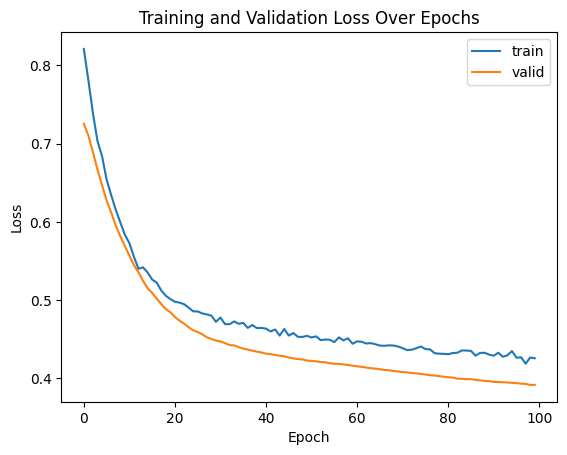

63/63 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8240 - recall: 0.1720
Test Loss, Test Accuracy: [0.39332494139671326, 0.8240000009536743, 0.17199017107486725]


In [77]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train", "valid"), loc=0)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.show()

# Evaluate the model on X_test and y_test
results = model_3.evaluate(X_test, y_test)
print("Test Loss, Test Accuracy:", results)

### Observation

* `Initial Decrease in Loss:` Both the training and validation loss decrease rapidly during the initial epochs. This indicates that the model is learning and fitting to the training data.

* `Validation Loss Lower than Training Loss:` After a few epochs, the validation loss becomes lower than the training loss. This is somewhat unusual but can happen, especially if there is regularization (like weight decay) applied to the model. It suggests that the regularization might be having a positive effect on the model's generalization ability.

* `Consistent Decrease in Loss:` Both the training and validation loss continue to decrease throughout the training process, without any significant signs of overfitting. If overfitting were occurring, we would typically see the training loss decrease while the validation loss starts to increase or plateau. Instead, both losses are decreasing, which indicates that the model is still learning effectively from the training data and generalizing well to the validation data.

* `Final Loss Values:` Towards the end of the 100 epochs, both the training and validation loss appear to be stabilizing and converging, which is a good sign. The training loss is slightly oscillating, which might suggest some minor fluctuations during the final optimization steps.

`Conclusion:`

Effective Learning: The model is learning effectively without overfitting, as indicated by the decreasing validation loss.
Regularization Effect: The regularization (weight decay) might be contributing positively to the model's ability to generalize, given the lower validation loss compared to the training loss.
Further Training: The consistent decrease in loss suggests that the model might benefit from additional epochs, though monitoring for potential overfitting would be necessary.

Overall, the graph indicates a well-trained model with effective generalization to the validation data. If you aim to further improve the model, you might consider experimenting with additional regularization techniques, tuning the hyperparameters, or training for more epochs with careful monitoring.

In [78]:
model_3_train_perf = model_performance_classification(model_3, X_train, y_train)
model_3_train_perf

200/200 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.827187,0.827187,0.826588,0.781333


In [79]:
model_3_valid_perf = model_performance_classification(model_3, X_val, y_val)
model_3_valid_perf

50/50 [==============================] - 0s 7ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.824375,0.824375,0.819116,0.777936


200/200 [==============================] - 1s 3ms/step
Best Threshold=0.247828, G-Mean=0.760


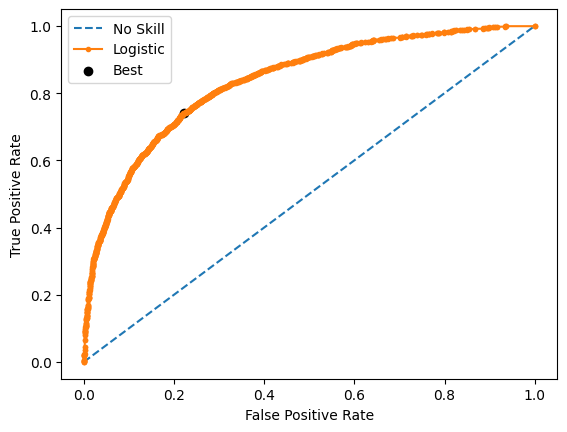

In [80]:
# predict probabilities
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

### Observation

* The plot suggests that, based on ROC-AUC analysis, the model's optimal threshold is determined to be 0.247828, and at this threshold, the G-Mean is 0.760. This threshold is selected to optimize the model's overall performance, considering both positive and negative class predictions.

50/50 [==============================] - 0s 2ms/step


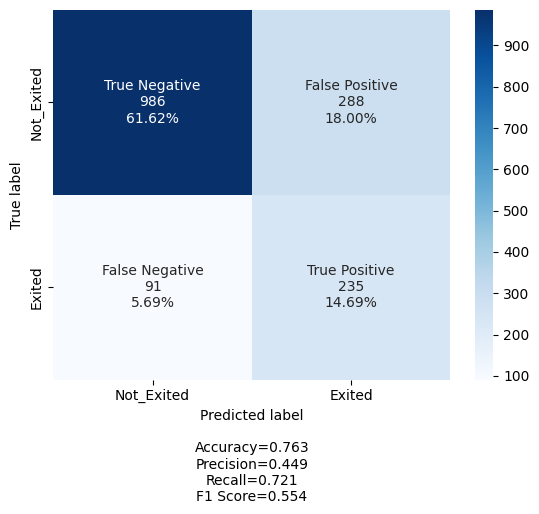

In [81]:
## Obtain the prediction on X_val and obtain the confusion matrix
y_pred1=model_3.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.24)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Observation

1. Accuracy and Imbalance:

* The model has an accuracy of 0.763 (76.3%), indicating that it correctly predicts the outcome 76.3% of the time. There is a noticeable imbalance in the prediction outcomes, with a higher number of true negatives (986) compared to true positives (235).

2. Low Precision and Moderate Recall:

* Precision is relatively low at 0.449 (44.9%), indicating a high rate of false positives. However, the recall is 0.721 (72.1%), showing that the model is fairly good at identifying true positives but at the expense of also including many false positives.

3. F1 Score:

* The F1 Score is 0.554 (55.4%), which is a harmonic mean of precision and recall. This score indicates moderate performance, suggesting the model has a balanced but not highly effective trade-off between precision and recall.

#### Tuning Model 3 to address Validation Loss Lower than Training Loss

In [127]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [128]:
# Initializing the neural network
model_3tuned = Sequential()
model_3tuned.add(Dense(32, input_dim=X_train.shape[1]))
model_3tuned.add(BatchNormalization())
model_3tuned.add(Activation('relu'))
model_3tuned.add(Dropout(0.2))  # Reduce dropout rate

model_3tuned.add(Dense(16))
model_3tuned.add(BatchNormalization())
model_3tuned.add(Activation('relu'))
model_3tuned.add(Dropout(0.1))  # Reduce dropout rate

model_3tuned.add(Dense(8))
model_3tuned.add(BatchNormalization())
model_3tuned.add(Activation('relu'))
#model_3tuned.add(Dropout(0.1))  # Reduce dropout rate

model_3tuned.add(Dense(1))
model_3tuned.add(Activation('sigmoid'))

In [129]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)  # Reduced learning rate
model_3tuned.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy", tf.keras.metrics.Recall()])

In [130]:
start = time.time()
history = model_3tuned.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=100)
end = time.time()

Epoch 1/100
319/319 [==============================] - 5s 5ms/step - loss: 0.7443 - accuracy: 0.4872 - recall: 0.7684 - val_loss: 0.7897 - val_accuracy: 0.2950 - val_recall: 0.8436
Epoch 2/100
319/319 [==============================] - 1s 3ms/step - loss: 0.7390 - accuracy: 0.4949 - recall: 0.7808 - val_loss: 0.7892 - val_accuracy: 0.3044 - val_recall: 0.8313
Epoch 3/100
319/319 [==============================] - 1s 3ms/step - loss: 0.7327 - accuracy: 0.4995 - recall: 0.7847 - val_loss: 0.7839 - val_accuracy: 0.3119 - val_recall: 0.8374
Epoch 4/100
319/319 [==============================] - 1s 3ms/step - loss: 0.7231 - accuracy: 0.5092 - recall: 0.7902 - val_loss: 0.7760 - val_accuracy: 0.3187 - val_recall: 0.8282
Epoch 5/100
319/319 [==============================] - 1s 3ms/step - loss: 0.7248 - accuracy: 0.5099 - recall: 0.7861 - val_loss: 0.7663 - val_accuracy: 0.3363 - val_recall: 0.8282
Epoch 6/100
319/319 [==============================] - 1s 3ms/step - loss: 0.7149 - accuracy: 0

### Observation

1. Improving Accuracy and Decreasing Loss:

* Both training and validation accuracy improve steadily, reaching around 72% and 73.5% respectively by epoch 100. The loss values for both training and validation sets consistently decrease over the epochs, indicating that the model is learning and fitting the data better over time.

2. Consistent Recall:

* The recall remains relatively high throughout the epochs, starting at around 77% and stabilizing around 75-76%. This indicates the model's strong ability to correctly identify positive cases consistently over time.

3. Convergence of Training and Validation Metrics:

* Training and validation loss, as well as accuracy, converge towards the later epochs, suggesting that the model is not overfitting and is generalizing well to the validation set. The final validation loss and accuracy values indicate that the model maintains good performance on unseen data.

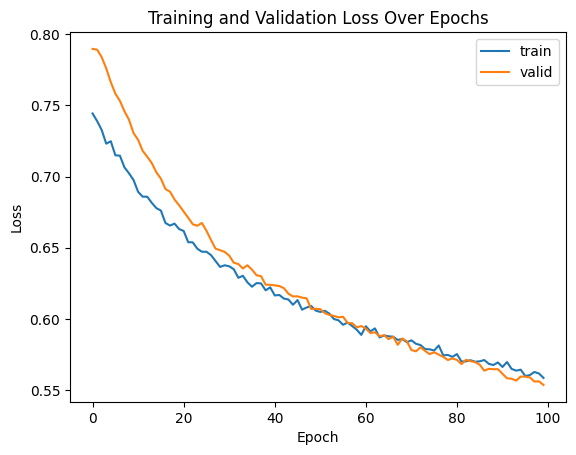

63/63 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.7200 - recall: 0.7150
Test Loss, Test Accuracy: [0.5548118948936462, 0.7200000286102295, 0.7149876952171326]


In [131]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train", "valid"), loc=0)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.show()

# Evaluate the model on X_test and y_test
results = model_3tuned.evaluate(X_test, y_test)
print("Test Loss, Test Accuracy:", results)

### Observation

1. Consistent Decrease in Loss:

* Both training and validation loss decrease steadily over the epochs, indicating that the model is learning effectively and improving its performance on both the training and validation sets.

2. Convergence of Training and Validation Loss:

* The training and validation loss curves converge towards the later epochs, suggesting that the model is not overfitting and is generalizing well to the validation data.

3. Validation Loss Higher Initially:

* The validation loss is higher than the training loss in the initial epochs but eventually converges and follows a similar trend. This is common as the model initially overfits the training data but then learns to generalize better to unseen data as training progresses.

In [132]:
model_3tuned_train_perf = model_performance_classification(model_3tuned, X_train, y_train)
model_3tuned_train_perf

319/319 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.757064,0.757064,0.757788,0.756894


In [133]:
model_3tuned_valid_perf = model_performance_classification(model_3tuned, X_val, y_val)
model_3tuned_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.735,0.735,0.811735,0.757138


319/319 [==============================] - 1s 2ms/step
Best Threshold=0.529178, G-Mean=0.761


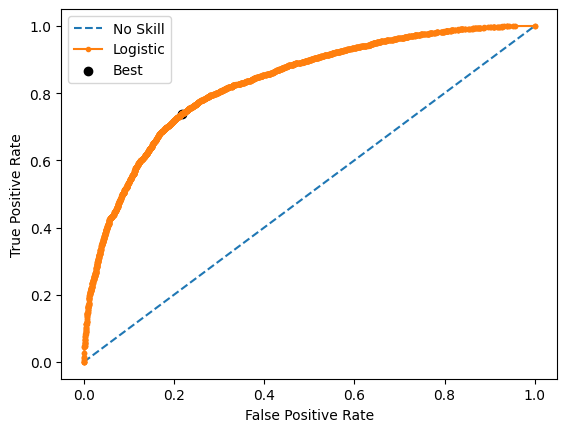

In [134]:
# predict probabilities
yhat = model_3tuned.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

### Observation
* The plot suggests that, based on ROC-AUC analysis, the model's optimal threshold is determined to be 0.529178, and at this threshold, the G-Mean is 0.761. This threshold is selected to optimize the model's overall performance, considering both positive and negative class predictions.

50/50 [==============================] - 0s 2ms/step


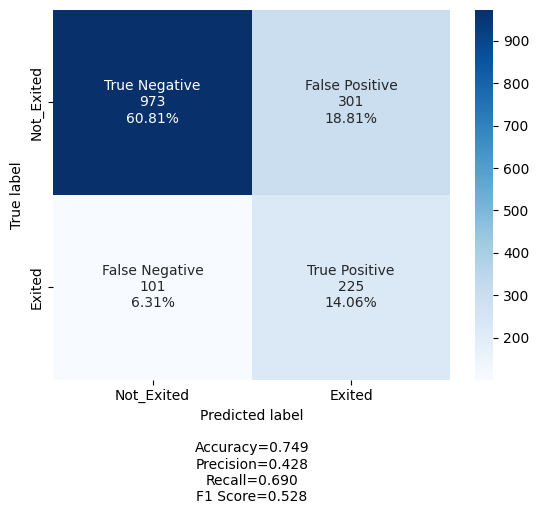

In [135]:
## Obtain the prediction on X_val and obtain the confusion matrix
y_pred1=model_3tuned.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.52)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Observation

1. Moderate Accuracy with High False Positives:

* The accuracy of the model is 0.749 (74.9%), indicating a decent performance in correctly predicting the outcomes. However, there is a notable number of false positives (301), which impacts the overall performance.

2. Low Precision and Moderate Recall:

* The precision is relatively low at 0.428 (42.8%), suggesting a high rate of false positives. On the other hand, the recall is 0.690 (69%), indicating the model's fair ability to identify true positive cases among all actual positives.

3. Balanced F1 Score:

* The F1 Score is 0.528 (52.8%), which reflects a balance between precision and recall. This indicates moderate effectiveness in identifying positive cases while balancing the false positives and false negatives. The score shows there is room for improvement in the model’s precision and overall predictive performance.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [136]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [137]:
## Apply SMOTE on train data
sm  = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



In [138]:
## Initilaize a sequential model
model_4 = Sequential()

# Add a input layer of 64 neurons with relu as activation function
model_4.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
model_4.add(BatchNormalization())

# Adding hidden layer with 32 neurons with relu as activation function
model_4.add(Dense(16,activation='relu'))
model_4.add(BatchNormalization())

## Add dense layers with 16 neurons
model_4.add(Dense(8,activation='relu'))
model_4.add(BatchNormalization())

## Add dense layers with 8 neurons
model_4.add(Dense(4,activation='relu'))
model_4.add(BatchNormalization())

# Add suitable activation function in the final layer
model_4.add(Dense(1, activation = 'sigmoid'))

In [139]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_2 (Bat  (None, 8)                 3

In [140]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)    # defining Adam as the optimizer to be used
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics= ["accuracy",tf.keras.metrics.Recall()])

In [141]:
start = time.time()
history = model_4.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=32, epochs=100)
end=time.time()

Epoch 1/100
319/319 [==============================] - 3s 4ms/step - loss: 0.7279 - accuracy: 0.5706 - recall: 0.6454 - val_loss: 0.6851 - val_accuracy: 0.5263 - val_recall: 0.6933
Epoch 2/100
319/319 [==============================] - 1s 3ms/step - loss: 0.6653 - accuracy: 0.6182 - recall: 0.6880 - val_loss: 0.6522 - val_accuracy: 0.5819 - val_recall: 0.6472
Epoch 3/100
319/319 [==============================] - 1s 3ms/step - loss: 0.6370 - accuracy: 0.6466 - recall: 0.7015 - val_loss: 0.6394 - val_accuracy: 0.6119 - val_recall: 0.6779
Epoch 4/100
319/319 [==============================] - 1s 3ms/step - loss: 0.6243 - accuracy: 0.6604 - recall: 0.7053 - val_loss: 0.6215 - val_accuracy: 0.6356 - val_recall: 0.6595
Epoch 5/100
319/319 [==============================] - 1s 3ms/step - loss: 0.6113 - accuracy: 0.6720 - recall: 0.7137 - val_loss: 0.6108 - val_accuracy: 0.6519 - val_recall: 0.6687
Epoch 6/100
319/319 [==============================] - 1s 3ms/step - loss: 0.6057 - accuracy: 0

### Observation

1. Consistent Improvement in Accuracy and Loss:

* Both training and validation accuracy improve steadily, reaching approximately 79.8% and 78.7% respectively by epoch 100. The loss values for both training and validation sets consistently decrease over the epochs, indicating that the model is learning and fitting the data well.

2. Recall Stability:

* The recall remains relatively stable and high throughout the epochs, starting around 64.5% and reaching up to 78.7% for training and 67.5% for validation. This indicates the model's strong and consistent ability to identify positive cases.

3. Convergence of Training and Validation Metrics:

* The training and validation loss, as well as accuracy, converge towards the later epochs, suggesting that the model is not overfitting and is generalizing well to the validation data. The final metrics indicate that the model maintains good performance on unseen data.

In [142]:
print("Time taken in seconds ",end-start)

Time taken in seconds  143.52252388000488


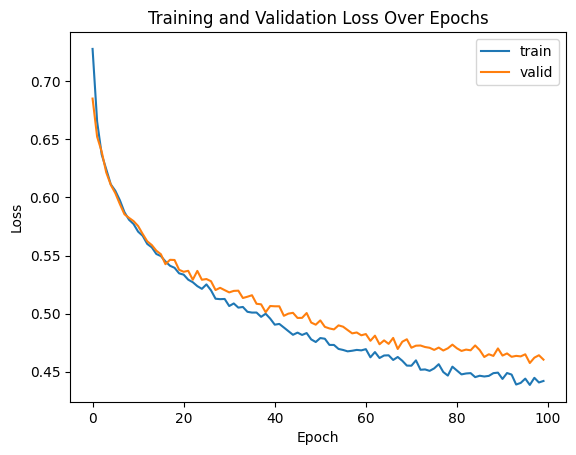

63/63 [==============================] - 0s 2ms/step - loss: 0.4636 - accuracy: 0.7940 - recall: 0.7002
Test Loss, Test Accuracy: [0.46360155940055847, 0.7940000295639038, 0.7002456784248352]


In [143]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train", "valid"), loc=0)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.show()

# Evaluate the model on X_test and y_test
results = model_4.evaluate(X_test, y_test)
print("Test Loss, Test Accuracy:", results)

### Observation

1. Steady Decrease in Loss:

* Both training and validation loss decrease steadily over the epochs, indicating that the model is learning effectively and improving its performance on both the training and validation sets.

2. Convergence and Stability:

* The validation loss follows a similar trend to the training loss and converges towards the later epochs, suggesting that the model is not overfitting and is generalizing well to the validation data. The losses stabilize around epoch 60, indicating that further training beyond this point might not yield significant improvements.

* Fluctuations in the training and validation loss curves suggest that the model is experiencing some instability or encountering noise in the data. This is a normal part of the training process, especially if the dataset is not perfectly clean or if there is some inherent variability in the data.

In [144]:
model_4_train_perf = model_performance_classification(model_4, X_train, y_train)
model_4_train_perf

319/319 [==============================] - 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.821036,0.821036,0.821203,0.821013


In [145]:
model_4_valid_perf = model_performance_classification(model_4, X_val, y_val)
model_4_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.786875,0.786875,0.821053,0.798793


319/319 [==============================] - 1s 2ms/step
Best Threshold=0.490149, G-Mean=0.822


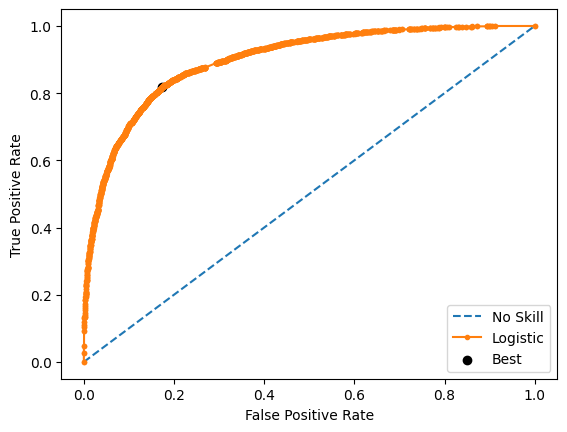

In [146]:
# predict probabilities
yhat = model_4.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

### Observation

* The plot suggests that, based on ROC-AUC analysis, the model's optimal threshold is determined to be 0.490149, and at this threshold, the G-Mean is 0.822. This threshold is selected to optimize the model's overall performance, considering both positive and negative class predictions.

50/50 [==============================] - 0s 2ms/step


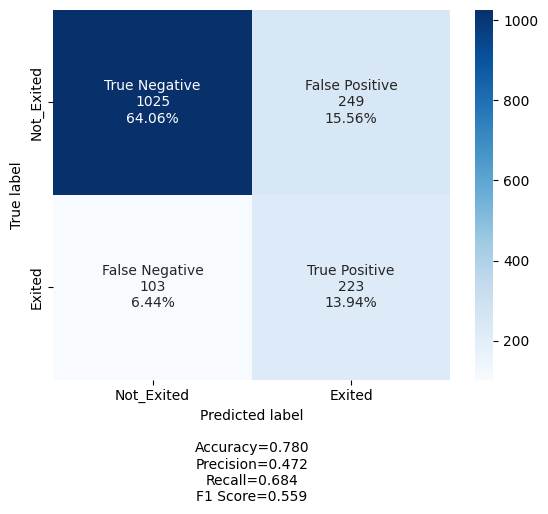

In [147]:
## Obtain the prediction on X_val and obtain the confusion matrix
y_pred1=model_4.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.49)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Observation

1. High Accuracy but Low Precision:

* The model has a high accuracy of 0.780 (78%), indicating that it is correct in its predictions 78% of the time. However, the precision is relatively low at 0.472 (47.2%), suggesting that there is a significant number of false positives compared to true positives.

2. Moderate Recall:

* The recall is 0.684 (68.4%), showing that the model is fairly good at identifying the actual positive cases. However, it misses some true positives, as indicated by the 103 false negatives.

3. Balanced F1 Score:

* The F1 Score is 0.559 (55.9%), which reflects a balance between precision and recall. This score indicates moderate performance, with the model doing a reasonably good job of handling the trade-off between precision and recall, but still having room for improvement in terms of reducing false positives and increasing true positive identification.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [148]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [149]:
## Apply SMOTE on train data
sm  = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



In [150]:
## Initilaize a sequential model
model_5 = Sequential()

# Add a input layer of 32 neurons with relu as activation function
model_5.add(Dense(32,activation='relu',input_dim = X_train.shape[1],kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
# Adding hidden layer with 16 neurons with relu as activation function
model_5.add(Dense(16,activation='relu'))
model_5.add(BatchNormalization())
## Add dense layers with 8 neurons
model_5.add(Dense(8,activation='relu'))
model_5.add(BatchNormalization())
## Add dense layers with 4 neurons
#model_5.add(Dense(4,activation='relu'))
#model_5.add(BatchNormalization())
# Add suitable activation function in the final layer
model_5.add(Dense(1, activation = 'sigmoid'))

In [151]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_2 (Bat  (None, 8)                 3

In [152]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)    # defining Adam as the optimizer to be used
model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics= ["accuracy", tf.keras.metrics.Recall()])

In [153]:
start = time.time()
history = model_5.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=32, epochs=100)
end=time.time()

Epoch 1/100
319/319 [==============================] - 3s 4ms/step - loss: 0.7835 - accuracy: 0.4805 - recall: 0.4486 - val_loss: 0.7175 - val_accuracy: 0.5531 - val_recall: 0.4448
Epoch 2/100
319/319 [==============================] - 1s 4ms/step - loss: 0.7610 - accuracy: 0.4988 - recall: 0.4639 - val_loss: 0.7447 - val_accuracy: 0.5369 - val_recall: 0.4969
Epoch 3/100
319/319 [==============================] - 2s 5ms/step - loss: 0.7433 - accuracy: 0.5074 - recall: 0.4668 - val_loss: 0.7298 - val_accuracy: 0.5462 - val_recall: 0.5061
Epoch 4/100
319/319 [==============================] - 2s 5ms/step - loss: 0.7250 - accuracy: 0.5262 - recall: 0.4890 - val_loss: 0.7198 - val_accuracy: 0.5575 - val_recall: 0.5215
Epoch 5/100
319/319 [==============================] - 1s 3ms/step - loss: 0.7140 - accuracy: 0.5394 - recall: 0.5008 - val_loss: 0.7045 - val_accuracy: 0.5756 - val_recall: 0.5245
Epoch 6/100
319/319 [==============================] - 1s 3ms/step - loss: 0.7030 - accuracy: 0

### Observation

1. Accuracy and Loss Trends:

* The model's accuracy has steadily improved over the 100 epochs, with both training and validation accuracy increasing.
Both training and validation loss have decreased, indicating that the model is learning and improving its predictions over time.

2. Initial Fluctuations:

* In the initial epochs, there are fluctuations in both training and validation loss. This is typical as the model tries to find the optimal weights.
As the epochs progress, these fluctuations stabilize, showing that the model is converging.

3. Convergence:

* Towards the later epochs, the training and validation loss curves become more stable and show a steady decline, suggesting that the model is converging and the learning rate is appropriate.

4. summary:

* The model demonstrates a typical learning pattern with initial fluctuations, improvement, and eventual convergence.
* The steady decrease in loss and increase in accuracy validate the model's learning capability.
* The fluctuations in the initial stages are normal and indicate that the model is adjusting its parameters to find optimal values.
* Overall, the model shows good performance and generalization, as indicated by the validation metrics.

In [154]:
print("Time taken in seconds ",end-start)

Time taken in seconds  143.93007135391235


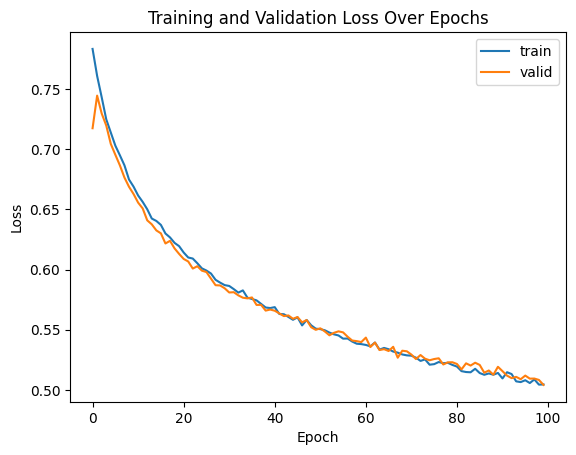

63/63 [==============================] - 1s 3ms/step - loss: 0.5015 - accuracy: 0.7525 - recall: 0.6708
Test Loss, Test Accuracy: [0.5014675855636597, 0.7524999976158142, 0.6707616448402405]


In [155]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train", "valid"), loc=0)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.show()

# Evaluate the model on X_test and y_test
results = model_5.evaluate(X_test, y_test)
print("Test Loss, Test Accuracy:", results)

### Observation

1. Effective Learning and Convergence:

* The training and validation losses show a steady decline and converge towards the end, indicating effective learning and good generalization.

2. Initial Fluctuations:

* Minor fluctuations in the early epochs are observed, which is typical as the model adjusts its parameters during the initial learning phase.

3. Stable Performance:

* Both training and validation loss curves follow a similar trend without significant divergence, suggesting that the model is not overfitting and is generalizing well to the validation data.

In [156]:
model_5_train_perf = model_performance_classification(model_5, X_train, y_train)
model_5_train_perf

319/319 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.772665,0.772665,0.772874,0.772621


In [157]:
model_5_valid_perf = model_performance_classification(model_5, X_val, y_val)
model_5_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.763125,0.763125,0.811555,0.779091


319/319 [==============================] - 1s 2ms/step
Best Threshold=0.530164, G-Mean=0.774


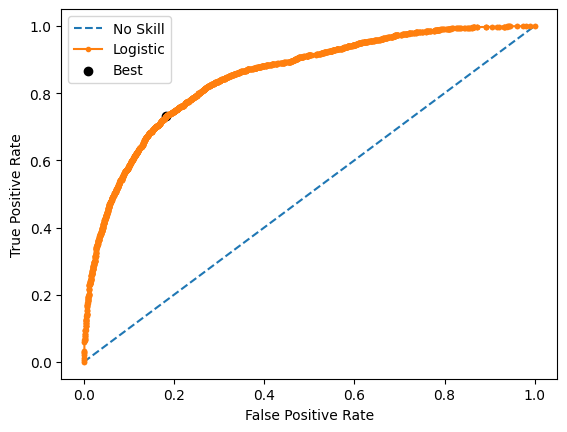

In [158]:
# predict probabilities
yhat = model_5.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

### Observation

* The plot suggests that, based on ROC-AUC analysis, the model's optimal threshold is determined to be 0.530164, and at this threshold, the G-Mean is 0.774. This threshold is selected to optimize the model's overall performance, considering both positive and negative class predictions.

50/50 [==============================] - 0s 2ms/step


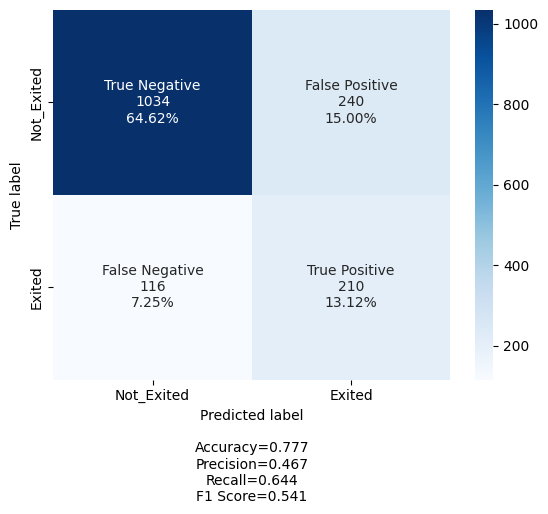

In [159]:
## Obtain the prediction on X_val and obtain the confusion matrix
y_pred1=model_5.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.53)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Observation

1. Accuracy and Precision:

* The model achieves an accuracy of 77.7%, which indicates that it correctly predicts the customer churn status (Exited/Not Exited) in most cases.
* However, the precision is relatively low at 46.7%, suggesting that a significant number of customers predicted to have exited (False Positives) actually did not exit.

2. Recall and F1 Score:

* The recall is 64.4%, meaning the model is fairly good at identifying the customers who actually exited, but it still misses 35.6% of them (False Negatives).
* The F1 Score, which balances precision and recall, is 0.541, indicating moderate performance.

3. Confusion Matrix Breakdown:

* True Negatives (Not Exited and correctly predicted): 1034 (64.62%)
* False Positives (Not Exited but incorrectly predicted as Exited): 240 (15.00%)
* False Negatives (Exited but incorrectly predicted as Not Exited): 116 (7.25%)
* True Positives (Exited and correctly predicted): 210 (13.12%)

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [40]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [41]:
## Apply SMOTE on train data
sm  = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



In [42]:
# Initialize a sequential model
model_6 = Sequential()

# Add an input layer of 64 neurons with relu as activation function
model_6.add(Dense(32, input_dim=X_train.shape[1]))
model_6.add(BatchNormalization())
model_6.add(Activation('relu'))

# Add dropout with dropout rate=0.4
model_6.add(Dropout(0.2))

# Adding hidden layer with 32 neurons with relu as activation function
model_6.add(Dense(16))
model_6.add(BatchNormalization())
model_6.add(Activation('relu'))

# Adding the dropout
model_6.add(Dropout(0.1))

# Add dense layer with 16 neurons
model_6.add(Dense(8))
model_6.add(BatchNormalization())
model_6.add(Activation('relu'))

# Adding the dropout
model_6.add(Dropout(0.1))

# Add dense layer with 8 neurons
#model_6.add(Dense(4))
#model_6.add(BatchNormalization())
#model_6.add(Activation('relu'))

# Adding the dropout
#model_6.add(Dropout(0.1))

# Add suitable activation function in the final layer
model_6.add(Dense(1))
model_6.add(Activation('sigmoid'))

In [43]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                       

In [44]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)    # defining Adam as the optimizer to be used
model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics= ["accuracy", tf.keras.metrics.Recall()])

In [45]:
start = time.time()
history = model_6.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=32, epochs=100)
end=time.time()

Epoch 1/100
319/319 [==============================] - 6s 4ms/step - loss: 0.7482 - accuracy: 0.4881 - recall: 0.7551 - val_loss: 0.7902 - val_accuracy: 0.2937 - val_recall: 0.8405
Epoch 2/100
319/319 [==============================] - 1s 3ms/step - loss: 0.7452 - accuracy: 0.4959 - recall: 0.7698 - val_loss: 0.7901 - val_accuracy: 0.3006 - val_recall: 0.8313
Epoch 3/100
319/319 [==============================] - 1s 4ms/step - loss: 0.7405 - accuracy: 0.4982 - recall: 0.7706 - val_loss: 0.7851 - val_accuracy: 0.3113 - val_recall: 0.8374
Epoch 4/100
319/319 [==============================] - 1s 4ms/step - loss: 0.7313 - accuracy: 0.5082 - recall: 0.7734 - val_loss: 0.7776 - val_accuracy: 0.3175 - val_recall: 0.8252
Epoch 5/100
319/319 [==============================] - 1s 4ms/step - loss: 0.7302 - accuracy: 0.5053 - recall: 0.7688 - val_loss: 0.7681 - val_accuracy: 0.3338 - val_recall: 0.8221
Epoch 6/100
319/319 [==============================] - 1s 4ms/step - loss: 0.7236 - accuracy: 0

### Observation

* Accuracy: Started low (~48.81%) and improved to 71.27% over 100 epochs.
* Loss: Both training and validation loss decreased steadily, showing effective learning.
* Recall: Remained high throughout training, indicating good sensitivity to the positive class.
* Generalization: The close alignment of training and validation loss suggests the model generalizes well without overfitting.

In [46]:
print("Time taken in seconds ",end-start)

Time taken in seconds  146.68556952476501


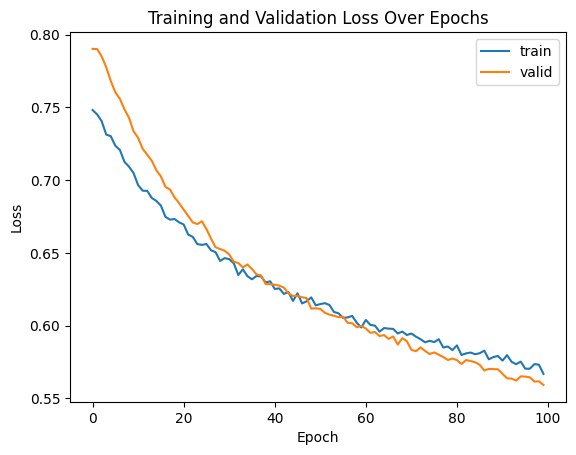

63/63 [==============================] - 2s 11ms/step - loss: 0.5604 - accuracy: 0.7190 - recall: 0.7101
Test Loss, Test Accuracy: [0.5603539347648621, 0.718999981880188, 0.710073709487915]


In [47]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train", "valid"), loc=0)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.show()

# Evaluate the model on X_test and y_test
results = model_6.evaluate(X_test, y_test)
print("Test Loss, Test Accuracy:", results)

### Observation

1. Consistent Decline in Loss:

* Both training and validation losses show a consistent decline over the epochs, indicating that the model is learning effectively.

2. Convergence of Loss:

* Training and validation losses converge around epoch 50, suggesting that the model is not overfitting and is generalizing well to the validation data.

3. Lower Validation Loss:

* After around epoch 45, the validation loss becomes slightly lower than the training loss. This is unusual but can sometimes occur due to regularization techniques or data augmentations applied only during training.

4. Conclusion:

* The training and validation losses indicate a well-behaved training process, with the model learning and generalizing effectively. The lack of overfitting and convergence of the two loss curves is a positive sign of model performance.

In [48]:
model_6_train_perf = model_performance_classification(model_6, X_train, y_train)
model_6_train_perf

319/319 [==============================] - 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.755789,0.755789,0.756493,0.755621


In [49]:
model_6_valid_perf = model_performance_classification(model_6, X_val, y_val)
model_6_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.73125,0.73125,0.810454,0.75396


319/319 [==============================] - 1s 2ms/step
Best Threshold=0.519808, G-Mean=0.759


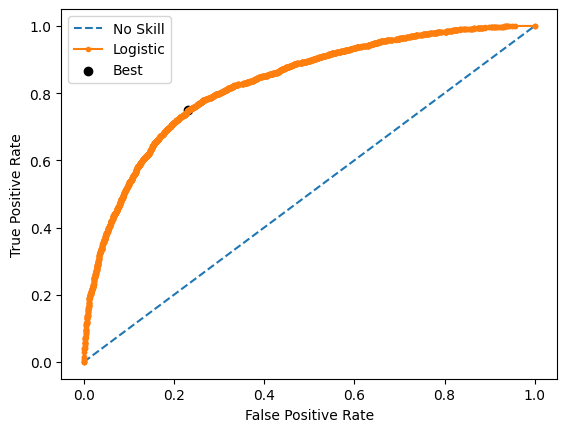

In [50]:
# predict probabilities
yhat = model_6.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

### Observation

* The output suggests that, based on ROC-AUC analysis, the model's optimal threshold is determined to be 0.519808, and at this threshold, the G-Mean is 0.759. This threshold is selected to optimize the model's overall performance, considering both positive and negative class predictions.

50/50 [==============================] - 0s 2ms/step


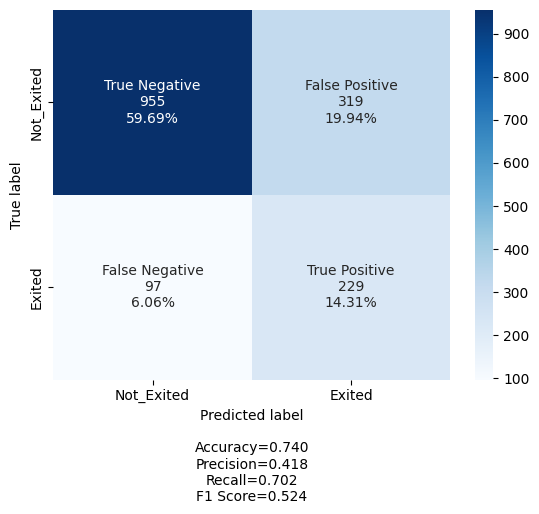

In [51]:
## Obtain the prediction on X_val and obtain the confusion matrix
y_pred1=model_6.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.51)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Observation

1. Accuracy:

* The model achieves an accuracy of 74.0%, which indicates that 74% of the predictions made by the model are correct.

2. Recall:

* Recall: 0.702
* A recall of 0.702 suggests that the model is able to identify 70.2% of the actual "Exited" cases.

3. Conclusion:

* The model shows a reasonable performance in terms of accuracy and recall but struggles with precision. This implies that while it can correctly identify many of the "Exited" cases, it also has a high rate of false positives. There might be a need to balance the precision and recall better, possibly through tuning the decision threshold or improving the model further.

## Implementing early stopping to to avoid unnecessary training once the validation loss plateaus.

In [58]:
from tensorflow.keras.callbacks import EarlyStopping
# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor the validation loss
    patience=10,          # Number of epochs with no improvement after which training will be stopped
    min_delta=0.001,
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

# Assuming `model_6` is already defined and compiled
history = model_6.fit(
    X_train, y_train,     # Training data and labels
    validation_data=(X_val, y_val), # Validation data and labels
    epochs=100,           # Number of epochs to train the model
    batch_size=32,        # Number of samples per gradient update
    callbacks=[early_stopping] # Pass the early stopping callback
)

Epoch 1/100
319/319 [==============================] - 2s 7ms/step - loss: 0.5273 - accuracy: 0.7505 - recall: 0.7553 - val_loss: 0.5108 - val_accuracy: 0.7531 - val_recall: 0.7147
Epoch 2/100
319/319 [==============================] - 2s 7ms/step - loss: 0.5254 - accuracy: 0.7478 - recall: 0.7453 - val_loss: 0.5054 - val_accuracy: 0.7588 - val_recall: 0.7117
Epoch 3/100
319/319 [==============================] - 4s 11ms/step - loss: 0.5300 - accuracy: 0.7472 - recall: 0.7514 - val_loss: 0.5139 - val_accuracy: 0.7531 - val_recall: 0.7239
Epoch 4/100
319/319 [==============================] - 2s 7ms/step - loss: 0.5295 - accuracy: 0.7493 - recall: 0.7526 - val_loss: 0.5066 - val_accuracy: 0.7563 - val_recall: 0.7086
Epoch 5/100
319/319 [==============================] - 2s 5ms/step - loss: 0.5275 - accuracy: 0.7454 - recall: 0.7473 - val_loss: 0.5106 - val_accuracy: 0.7538 - val_recall: 0.7178
Epoch 6/100
319/319 [==============================] - 2s 5ms/step - loss: 0.5293 - accuracy: 

### Observation

1. Training and Validation Loss:

* Both the training and validation loss show a decreasing trend, indicating that the model is learning and improving over time.
* The validation loss follows the training loss closely, suggesting that the model is not overfitting significantly.

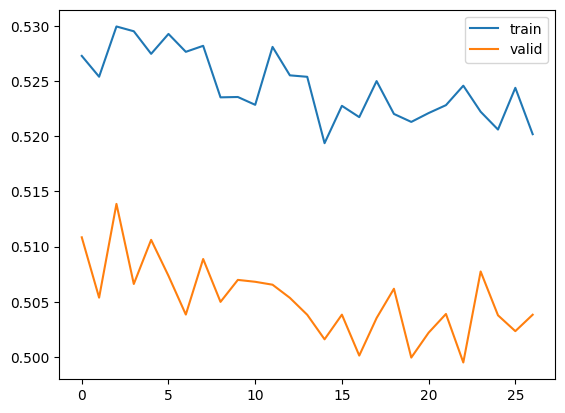

In [59]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

### Observation

1. Early Stopping:

* The early stopping mechanism has likely been triggered, stopping the training process once the validation loss stops improving.
* This helps prevent overfitting by halting the training when further training does not yield significant improvements on the validation set.

2. conclusion:

* The early stopping mechanism has successfully halted the training at an optimal point, preventing overfitting and ensuring that the model generalizes well on the validation data. The training and validation losses are decreasing steadily, and the accuracy and recall metrics are consistent, indicating a robust training process.

<font size=6 color='green'> Model Performance Comparison and Final Model Selection

In [172]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network with SGD Optimizer",
    "Neural Network with Adam Optimizer",
    "Neural Network with Adam Optimizer + Dropout",
    "Neural Network with Balanced Data (by applying SMOTE) + SGD Optimizer",
    "Neural Network with Balanced Data (by applying SMOTE) + Adam Optimizer",
    "Neural Network with Balanced Data (by applying SMOTE) + Adam Optimizer + Dropout",
]
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network with SGD Optimizer",
    "Neural Network with Adam Optimizer",
    "Neural Network with Adam Optimizer + Dropout",
    "Neural Network with Balanced Data (by applying SMOTE) + SGD Optimizer",
    "Neural Network with Balanced Data (by applying SMOTE) + Adam Optimizer",
    "Neural Network with Balanced Data (by applying SMOTE) + Adam Optimizer + Dropout"
]
models_train_comp_df

,Neural Network with SGD Optimizer,Neural Network with Adam Optimizer,Neural Network with Adam Optimizer + Dropout,Neural Network with Balanced Data (by applying SMOTE) + SGD Optimizer,Neural Network with Balanced Data (by applying SMOTE) + Adam Optimizer,Neural Network with Balanced Data (by applying SMOTE) + Adam Optimizer + Dropout
Accuracy,0.855000,0.868906,0.827187,0.821036,0.772665,0.755789
Recall,0.855000,0.868906,0.827187,0.821036,0.772665,0.755789
Precision,0.844161,0.860935,0.826588,0.821203,0.772874,0.756493
F1 Score,0.841266,0.858468,0.781333,0.821013,0.772621,0.755621


In [173]:
models_valid_comp_df

,Neural Network with SGD Optimizer,Neural Network with Adam Optimizer,Neural Network with Adam Optimizer + Dropout,Neural Network with Balanced Data (by applying SMOTE) + SGD Optimizer,Neural Network with Balanced Data (by applying SMOTE) + Adam Optimizer,Neural Network with Balanced Data (by applying SMOTE) + Adam Optimizer + Dropout
Accuracy,0.841875,0.840625,0.824375,0.786875,0.763125,0.731250
Recall,0.841875,0.840625,0.824375,0.786875,0.763125,0.731250
Precision,0.827429,0.826353,0.819116,0.821053,0.811555,0.810454
F1 Score,0.825208,0.827001,0.777936,0.798793,0.779091,0.753960


In [174]:
models_train_comp_df.loc["Recall"] - models_valid_comp_df.loc["Recall"]

Neural Network with SGD Optimizer                                                   0.013125
Neural Network with Adam Optimizer                                                  0.028281
Neural Network with Adam Optimizer + Dropout                                        0.002812
Neural Network with Balanced Data (by applying SMOTE) + SGD Optimizer               0.034161
Neural Network with Balanced Data (by applying SMOTE) + Adam Optimizer              0.009540
Neural Network with Balanced Data (by applying SMOTE) + Adam Optimizer + Dropout    0.024539
Name: Recall, dtype: float64

#### Observation

* Model_3 demonstrates the best performance in terms of the difference in Recall metrics between the validation and test sets, indicating that it generalizes well.
* Model_3 : adam optimiser + dropout

319/319 [==============================] - 3s 6ms/step
Best Threshold=0.245829, G-Mean=0.775


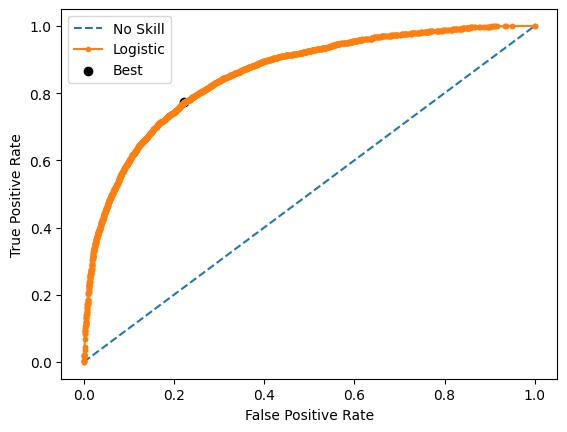

In [175]:
# predicting probabilities using the best model
yhat = model_3.predict(X_train)
# keeping probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculating roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculating the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locating the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plotting the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# showing the plot
pyplot.show()

### Observation

* The output suggests that, based on ROC-AUC analysis, the model's optimal threshold is determined to be 0.245829, and at this threshold, the G-Mean is 0.775. This threshold is selected to optimize the model's overall performance, considering both positive and negative class predictions.

In [176]:
# Predict the X_test data using the best model
y_pred_test = model_3.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
print(y_pred_test)

63/63 [==============================] - 0s 3ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [189]:
from sklearn.metrics import classification_report
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.24)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      5096
           1       0.77      0.78      0.77      5096

    accuracy                           0.77     10192
   macro avg       0.77      0.77      0.77     10192
weighted avg       0.77      0.77      0.77     10192



In [190]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_val,y_valid_pred>0.24)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1274
           1       0.45      0.72      0.55       326

    accuracy                           0.76      1600
   macro avg       0.68      0.75      0.70      1600
weighted avg       0.82      0.76      0.78      1600



In [193]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.24)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1593
           1       0.44      0.73      0.55       407

    accuracy                           0.76      2000
   macro avg       0.68      0.75      0.69      2000
weighted avg       0.82      0.76      0.78      2000



### Observation

* Class 0 Performance: The model shows strong performance for class 0 (Not Exited) with a high precision of 0.92 and a recall of 0.76. This indicates that the model is quite accurate when predicting class 0, although it misses some true positives (people who exited).

* Class 1 Performance: For class 1 (Exited), the precision is lower at 0.44, but the recall is relatively high at 0.73. This suggests that while the model is good at identifying most of the true positives in class 1, it also includes a substantial number of false positives.

* Overall Accuracy: The overall accuracy of the model is 0.76, indicating that the model correctly classifies 76% of the instances.

* Macro and Weighted Averages: The macro average recall is 0.75, and the weighted average recall is 0.76. These metrics show a good balance between the two classes, although the precision for class 1 brings down the macro and weighted average precision values.

* F1 Scores: The F1-score for class 0 is 0.83, reflecting a good balance between precision and recall. For class 1, the F1-score is 0.55, indicating that there is room for improvement in predicting this class more accurately.

* Overall, the model performs well for the majority class (class 0) but has difficulty achieving high precision for the minority class (class 1), even though it has a decent recall for this class. This suggests that while the model is good at identifying those who exited, it also incorrectly identifies a significant number of non-exited customers as exited.

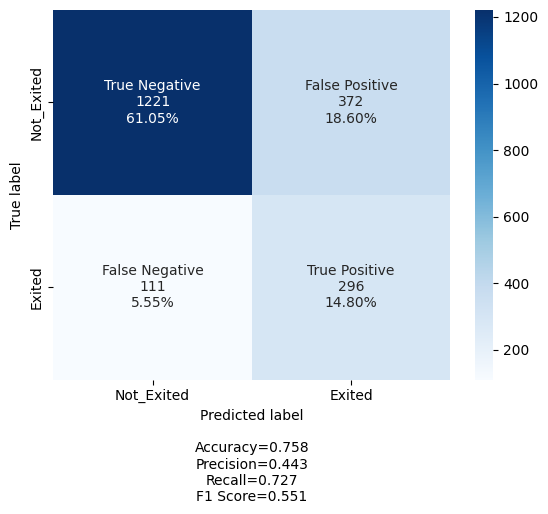

In [195]:
# Obtain the confusion matrix
cm_h=confusion_matrix(y_test,y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Observation

* The model, with a focus on maximizing recall, shows a reasonable trade-off between precision and recall, however, there has been a decline in recall compared to the previous models.
* True Negatives (Not Exited): The model correctly identified 1221 instances as Not Exited, which is 61.05% of the total predictions.
* True Positives (Exited): The model correctly identified 296 instances as Exited, which is 14.80% of the total predictions.
* False Positives: The model incorrectly classified 372 instances as Exited when they were Not Exited, which is 18.60% of the total predictions.
* False Negatives: The model missed 111 instances that were Exited, classifying them as Not Exited, which is 5.55% of the total predictions.

* The model has good recall but moderate precision, indicating it is better at identifying actual Exited cases but also has a fair amount of false positives.

<font size=6 color='red'>Actionable Insights and Business Recommendations

* An analysis of gender and exits shows a higher churn rate among females (25%) compared to males (16%). To address this, the bank could implement targeted strategies for female customers, such as hiring more female customer service representatives or offering promotions and incentives specifically aimed at retaining female customers.

* Examining geography and exits reveals that Germany has the highest churn rate at nearly 32%, followed by France and Spain, both at approximately 16%. Since France has the largest customer base (around 51%), and Germany and Spain account for about 25% each, the bank could benefit from focusing on customers in Germany and France with targeted promotions and offers.

* There is a moderate positive correlation of 0.29 between age and the number of customers who have left the bank. Approximately 75% of churned customers are between the ages of 39 and 51. The bank could focus on this age group by offering additional support, promotions, and discounts.

* The analysis of the stacked bar plot shows a higher churn rate among inactive customers compared to active ones. This suggests that the bank could benefit from identifying these inactive customers and implementing targeted promotions to re-engage them.

* 75% of churned customers have balances between 50,000 and 130,000. This suggests that customers with balances below 50,000 tend to have a lower churn rate. The bank should target customers with balances between 50,000 and 130,000 with offers and promotions to encourage retention.

* Building a robust predictive model is essential for the bank. The most critical scenario occurs when the model predicts a customer will stay, but in reality, they leave. This misidentification poses a significant risk, as the bank may miss opportunities to address issues with at-risk customers.

* To minimize this loss, the bank should prioritize reducing false negatives. Enhancing the recall metric is essential in this context. A higher recall value indicates a better ability to identify true positives (customers who are actually exiting), allowing the bank to take proactive measures to retain these customers.

* Among the various strategies for building the model, it is advisable for the bank to use Model 3, a Neural Network model with Dropout, as it demonstrates the best performance.

* Plotting the loss function for the model shows a consistent decrease in both training and validation loss as the number of epochs increases. This trend suggests that the model is generalizing well, without any clear signs of overfitting or underfitting.

* The best model's performance on the validation dataset shows high precision (0.92) for non-churned customers and decent precision (0.45) for churned customers. It achieves strong recall (0.77) for non-churned customers, though the recall for churned customers is slightly lower (0.72).

* The best model's performance on the test dataset shows high precision (0.92) for non-churned customers and moderate precision (0.44) for churned customers. It achieves strong recall (0.76) for non-churned customers, though the recall for churned customers is comparatively lower (0.73).

* The best model, emphasizing recall, demonstrates reasonably good recall and a balanced trade-off between precision and recall, achieving an overall strong and balanced performance.



<font size=6 color='red'>Power Ahead</font>
___

<font size=6 color='yellow'>Appendix (Detailed EDA)

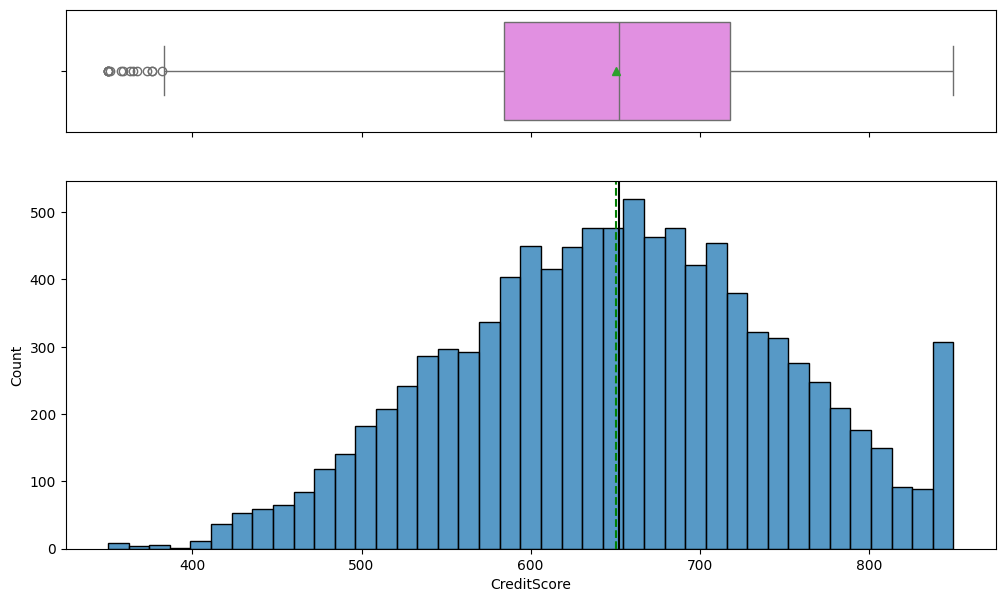

In [ ]:
## Creating histogram_boxplot for CreditScore
histogram_boxplot(df,'CreditScore')

### Obervation

* The distribution of credit scores is almost normal, with the mean and median being very close. However, there are outliers, particularly in the lower range of credit scores.

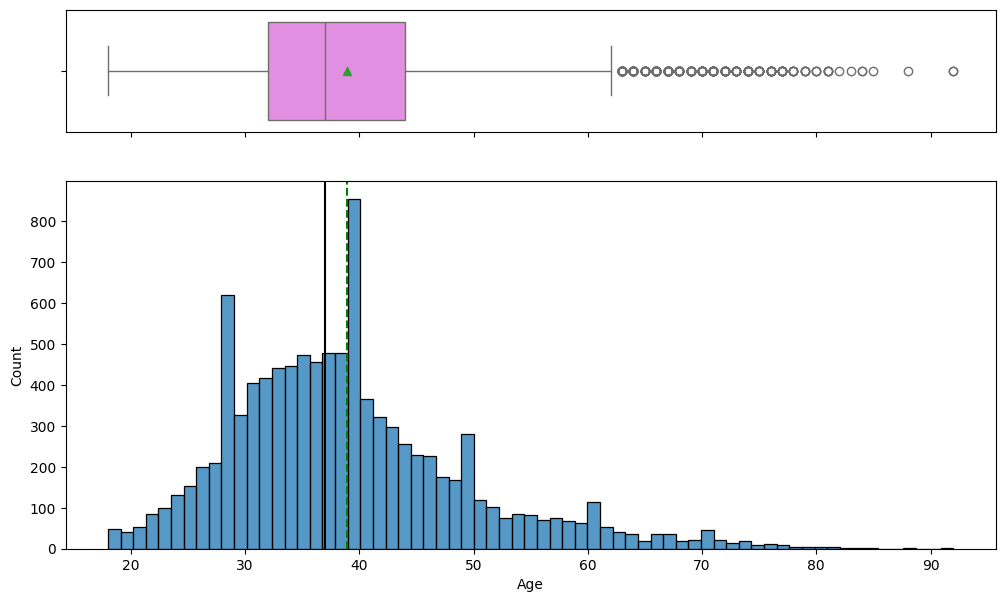

In [ ]:
## Creating histogram_boxplot for Age
histogram_boxplot(df,'Age')

### Observation

* The distribution of age is nearly normal, with the mean and median closely aligned. However, outliers are evident, particularly among older individuals.

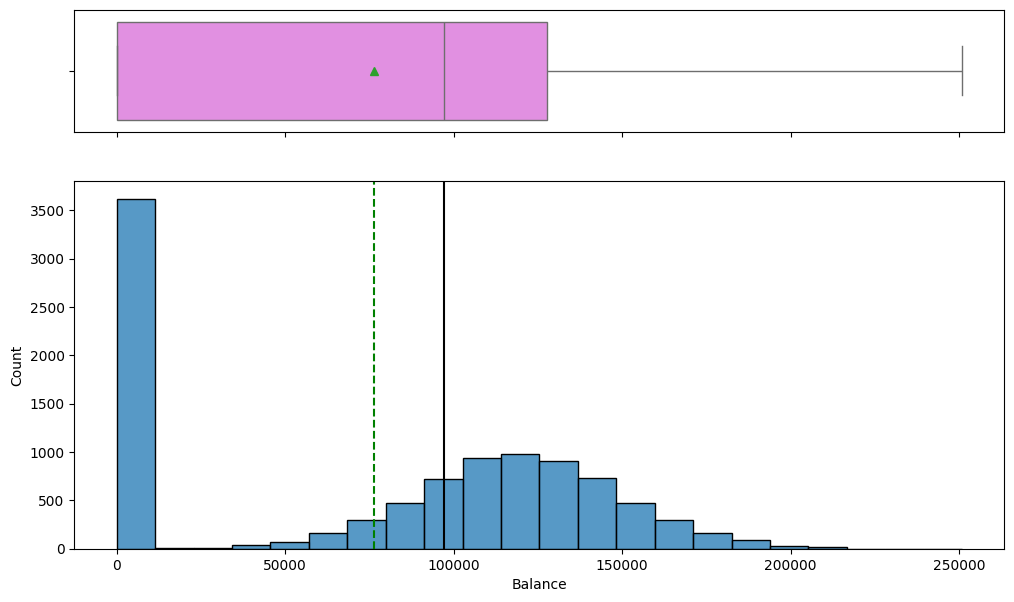

In [ ]:
## Creating histogram_boxplot for Balance
histogram_boxplot(df,'Balance')

### Observation

* The distribution of account balances is right-skewed, with a significant number of customers having balances close to zero.

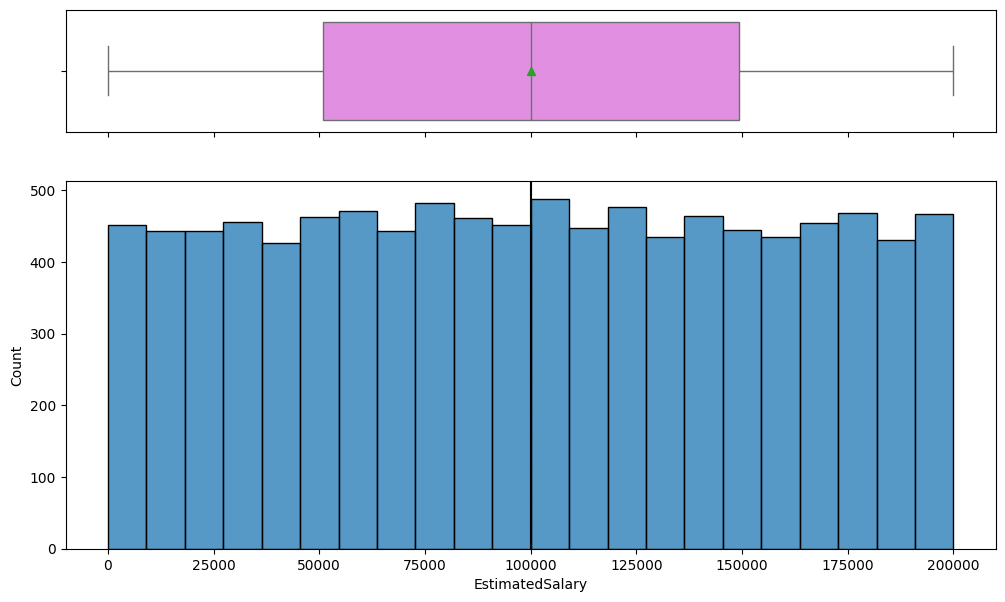

In [ ]:
## Creating histogram_boxplot for Estimated Salary
histogram_boxplot(df,'EstimatedSalary')

### Observation

* The distribution of estimated salaries is approximately uniform and exhibits a normal pattern. Importantly, there are no outliers detected in the dataset.

HasCrCard     0     1    All
Gender                      
All        2945  7055  10000
Male       1594  3863   5457
Female     1351  3192   4543
------------------------------------------------------------------------------------------------------------------------


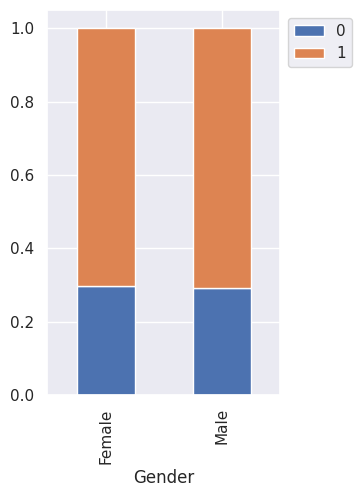

In [ ]:
stacked_barplot(df, "Gender", "HasCrCard")

* It shows equal percentage of males and females have credit card.

IsActiveMember     0     1    All
Gender                           
All             4849  5151  10000
Male            2590  2867   5457
Female          2259  2284   4543
------------------------------------------------------------------------------------------------------------------------


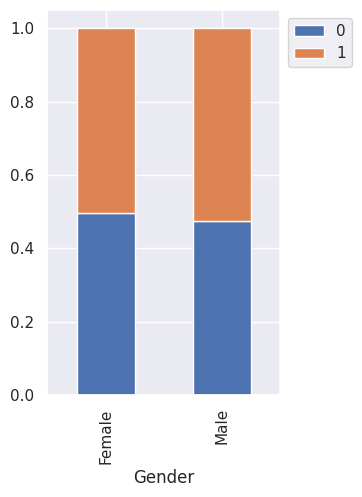

In [ ]:
stacked_barplot(df, "Gender", "IsActiveMember")

* Approciamately equal percentage of male and female are active, Males are slightly more.

IsActiveMember     0     1    All
Geography                        
All             4849  5151  10000
France          2423  2591   5014
Germany         1261  1248   2509
Spain           1165  1312   2477
------------------------------------------------------------------------------------------------------------------------


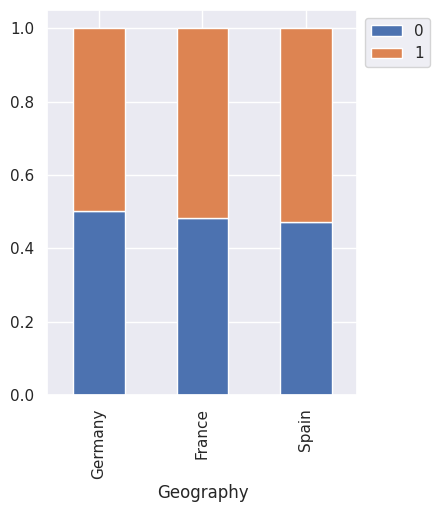

In [ ]:
stacked_barplot(df, "Geography", "IsActiveMember")

* approximatle 50 percent of customers in France, Germany and Spain are not active.

HasCrCard     0     1    All
Geography                   
All        2945  7055  10000
France     1471  3543   5014
Spain       756  1721   2477
Germany     718  1791   2509
------------------------------------------------------------------------------------------------------------------------


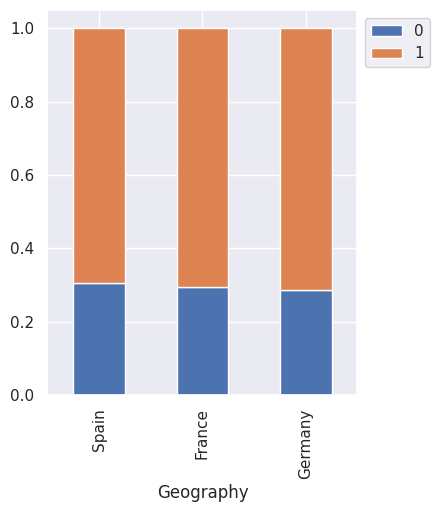

In [ ]:
stacked_barplot(df, "Geography", "HasCrCard")

* Approximately 30 percent in France, Spain and Germany do not have credit card.